# EDA #
*by Rosana de Oliveira Gomes*

In this notebook, we investigate the text extracted by websites associated to Climate Change Mitation by applying NLP and data analysis techniques. 

The data used in this project comes from the [ImpactLab](https://impactlab.org) and [DrawDown](https://drawdown.org/sectors/) websites.

In this analysis, you will learn about:

* keyword extraction 
* data Cleaning and preprocessing with NLP
* assigning categories to text based on a description
* text data visualization 


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## Loading Data ##

Getting data from the scraping of the websites.


In [2]:
#df_dd_tableofsolutions = pd.read_csv('datasets/dd_tableofsolutions_table.csv')
df_dd_solutions = pd.read_csv('datasets/dd_solutions_data.csv')
df_il_articles = pd.read_csv('datasets/il_articles.csv')
df_il_article_content = pd.read_csv('datasets/il_article_content.csv')

df_il_articles_full = pd.merge(df_il_articles, df_il_article_content, how = 'left', 
                               on=["url", 'citation', 'pub_date'])

print(f"shape dd_sectors: {df_dd_solutions.shape}", 
      df_dd_solutions.columns)
df_dd_solutions.head(3)



shape dd_sectors: (82, 23) Index(['Unnamed: 0', 'title', 'node1', 'area', 'node2', 'url', 'st_value1',
       'st_unit1', 'st_label1', 'st_value2', 'st_unit2', 'st_label2',
       'st_value3', 'st_unit3', 'st_label3', 'st_value4', 'st_unit4',
       'st_label4', 'short_def', 'summary', 'impact', 'tech_link',
       'tech_summary'],
      dtype='object')


Unnamed: 0                           title       node1            area  \
0           0  Abandoned Farmland Restoration  Land Sinks   Support Sinks   
1           1              Alternative Cement    Industry  Reduce Sources   
2           2        Alternative Refrigerants    Industry  Reduce Sources   

                  node2                                                url  \
0     Use Degraded Land  https://drawdown.org/solutions/abandoned-farml...   
1     Improve Materials  https://drawdown.org/solutions/alternative-cement   
2  Address Refrigerants  https://drawdown.org/solutions/alternative-ref...   

     st_value1  st_unit1                                       st_label1  \
0  12.48–20.32  Gigatons  CO2 EquivalentReduced / Sequestered(2020–2050)   
1    7.98–16.1  Gigatons  CO2 EquivalentReduced / Sequestered(2020–2050)   
2  43.53–50.53  Gigatons  CO2 EquivalentReduced / Sequestered(2020–2050)   

       st_value2  ...      st_unit3                        st_label3  \
0  $98.16–159.91  ...  Trillion $US  Lifetime NetOperational Savings   
1        $-63.46  ...             0                                0   
2              0  ...             0                                0   

    st_value4      st_unit4           st_label4  \
0  $2.66–4.34  Trillion $US  LifetimeNet Profit   
1           0             0                   0   
2           0             0                   0   

                                           short_def  \
0  Degraded farmland is often abandoned, but need...   
1                                                NaN   
2  Fluorinated gases are not the only refrigerant...   

                                             summary  \
0  Solution Summary*Around the world, farmers are...   
1  Solution Summary*Cement is a vital source of s...   
2  Solution SummaryThis is a new solution; a summ...   

                                              impact  \
0  Impact: Currently, 0.4 billion hectares of far...   
1                                                NaN   
2  Impact: Pursuant to the Kigali Accord signed i...   

                                           tech_link  \
0  https://drawdown.org/solutions/abandoned-farml...   
1  https://drawdown.org/solutions/alternative-cem...   
2  https://drawdown.org/solutions/alternative-ref...   

                                        tech_summary  
0  Project Drawdown describes abandoned farmland ...  
1  Project Drawdown defines alternative cement as...  
2  Project Drawdown defines alternative refrigera...  

[3 rows x 23 columns]

In [3]:
print(f"shape df_il_articles: {df_il_articles.shape}", df_il_articles.columns)
print(f"shape df_il_article_content: {df_il_article_content.shape}", df_il_article_content.columns)

print(len(df_il_article_content), len(df_il_article_content), len(df_il_articles_full))
df_il_article_content.head(6)


shape df_il_articles: (54, 8) Index(['Unnamed: 0', 'category', 'url', 'citation', 'link', 'sumary', 'type',
       'pub_date'],
      dtype='object')
shape df_il_article_content: (54, 10) Index(['Unnamed: 0', 'abstract', 'articleType', 'article_links', 'citation',
       'content', 'download_link', 'header', 'pub_date', 'url'],
      dtype='object')
54 54 54


Unnamed: 0                                           abstract  \
0           0  Heat stress harms human health, agriculture, a...   
1           1  Mechanisms such as ice-shelf hydrofracturing a...   
2           2  This assessment concludes, based on extensive ...   
3           3                                                NaN   
4           4  The impacts of heat waves in a warming climate...   
5           5  This paper outlines a two-step process to retu...   

       articleType                                      article_links  \
0  Journal Article  ['https://iopscience.iop.org/article/10.1088/1...   
1  Journal Article  ['http://onlinelibrary.wiley.com/doi/10.1002/2...   
2  Journal Article          ['https://science2017.globalchange.gov/']   
3           Report                                                 []   
4  Journal Article  ['https://doi.org/10.1029/2019JD032100', 'http...   
5    Working Paper  ['https://ssrn.com/abstract=3764255', 'https:/...   

                                            citation  \
0  \nDawei Li, Jiacan Yuan, and Robert (Bob) Kopp...   
1  \nKopp, R. E., DeConto, R. M., Bader, D. A., H...   
2  \nUSGCRP, 2017: Climate Science Special Report...   
3          \nU.S. Government Accountability Office\n   
4  \nYuan, J., Stein, M. L., & Kopp, R. E. (2020)...   
5  \nCarleton, Tamma and Greenstone, Michael, Upd...   

                                             content  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  \n\n\nThe social cost of carbon (SCC), the tot...   

                                       download_link  \
0  https://impactlab.org/wp-content/uploads/2017/...   
1  https://impactlab.org/wp-content/uploads/2017/...   
2  https://impactlab.org/wp-content/uploads/2017/...   
3           http://www.gao.gov/assets/690/687466.pdf   
4           http://www.gao.gov/assets/690/687466.pdf   
5  https://impactlab.org/wp-content/uploads/2021/...   

                                              header  \
0  Escalating Global Exposure to Compound Heat-Hu...   
1  Evolving Understanding of Antarctic Ice-Sheet ...   
2  Climate Science Special Report: Fourth Nationa...   
3  Climate Change: Information on Potential Econo...   
4  The Evolving Distribution of Relative Humidity...   
5  Updating the United States Government’s  Socia...   

                      pub_date  \
0      Published March 7, 2020   
1  Published December 13, 2017   
2   Published November 3, 2017   
3   Published October 24, 2017   
4  Published September 9, 2020   
5   Published January 14, 2021   

                                                 url  
0  https://impactlab.org/research/escalating-glob...  
1  https://impactlab.org/research/evolving-unders...  
2  https://impactlab.org/research/climate-science...  
3  https://impactlab.org/research/climate-change-...  
4  https://impactlab.org/research/the-evolving-di...  
5  https://impactlab.org/research/updating-the-un...

In [4]:
#print(f"shape df_il_articles_full: {df_il_articles_full.shape}", df_il_articles_full.columns)
#df_il_articles_full.head(10)


Clearning the datasets to contain only relevant columns:

In [5]:
df_dd_solutions = df_dd_solutions.drop(columns=['Unnamed: 0', 'url', 'st_value1', 
                                                'st_unit1', 'st_value2', 'st_unit2', 
                                                'st_label2', 'st_value3', 'st_unit3', 
                                                'st_label3', 'st_value4', 'st_unit4', 
                                                'st_label4', 'tech_link'])

df_il_articles = df_il_articles.drop(columns=['Unnamed: 0', 'url', 'citation', 
                                              'link', 'type','pub_date'])

df_il_article_content = df_il_article_content.drop(columns=['Unnamed: 0', 'articleType',
                                                            'article_links', 'citation',
                                                            'download_link', 'pub_date', 
                                                            'url'])



## Text Cleaning ##

Steps for typical NLP preprocessing to be applied to the title and summary of service opportunities.

Let's start with importing relevant NLP libraries

In [6]:
import contractions
import string
import nltk
import regex as re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /home/rosana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rosana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rosana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rosana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Next, let's assingn new columns to a copy of the original dataframe, in order to store the preprocessed text of the `title` and `summary` columns.

**Step 1:** Contraction Mapping / Expanding Contractions

**Step 2:** Tokenization


**Step 3:** Lowercasing

**Step 4:** Spell Checking 

**Step 5:** Removing ‘Stop Words’ 


**Step 6:** Stemming/Lemmatization

In [7]:
# Preprocessing function

def text_preprocessing(text, spelling=False):
    '''
    NLP preprocessing steps in a given dataframe and returns a preprocessed dataframe
    1. Remove contractions
    2. Tokenization
    3. Lowercasing
    4. Remove punctuation
    5. Remove stopwords
    6. Replace misspelled words
    7. Lemmatization
    
    Arguments:
    `descriptions`: descriptions to be preprocessed
    '''
    
    # 
    
    # Make sure we have a column of a data frame as input
    text = pd.Index(text).fillna('')
    
    # 1. Removing contractions
    preprocessed = text.map(lambda x: [contractions.fix(word) for word in x.split()])
    preprocessed = preprocessed.map(lambda x: ' '.join(w for w in x))
    
    # 2. Tokenization
    preprocessed = preprocessed.map(word_tokenize)
    
    # 3. Set all words to lower case
    preprocessed = preprocessed.map(lambda x: [word.lower() for word in x])
    
    # 4. Remove punctuation
    punc = string.punctuation
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in punc])
    
    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in stop_words])
    
    # 6. Replace misspelling
    if spelling:
        spell = SpellChecker()
        preprocessed = preprocessed.map(lambda x: [spell.correction(word) for word in x])
  
    # 7. Lemmatization
    
    preprocessed = preprocessed.map(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    preprocessed = preprocessed.map(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                               for (word, pos_tag) in x])
    
    wnl = WordNetLemmatizer()
    preprocessed = preprocessed.map(lambda x: [wnl.lemmatize(word, tag) 
                                               for word, tag in x])
#    now = datetime.now()

#    print("Current Time =", now)
    return preprocessed

In [8]:
print('Number of solutions: ', len(set(df_dd_solutions['title'])))

print(set(df_dd_solutions['title']))

print(set(df_dd_solutions['node1']))

print(set(df_dd_solutions['area'])) 
     
print(set(df_dd_solutions['node2'])) 
      

df_dd_solutions.head()


Number of solutions:  82
{'Nuclear Power', 'Walkable Cities', 'Sustainable Intensification for Smallholders', 'Building Automation Systems', 'Water Distribution Efficiency', 'Health and Education', 'Regenerative Annual Cropping', 'Micro Wind Turbines', 'Coastal Wetland Protection', 'Silvopasture', 'Efficient Trucks', 'Telepresence', 'Perennial Biomass Production', 'Recycled Paper', 'Public Transit', 'District Heating', 'Microgrids', 'Recycling', 'Composting', 'Insulation', 'LED Lighting', 'Bicycle Infrastructure', 'Nutrient Management', 'Electric Trains', 'Tree Intercropping', 'Dynamic Glass', 'Biochar Production', 'Distributed Solar Photovoltaics', 'Bioplastics', 'Onshore Wind Turbines', 'Peatland Protection and Rewetting', 'Carpooling', 'Biogas for Cooking', 'Ocean Power', 'Improved Rice Production', 'Alternative Refrigerants', 'Efficient Ocean Shipping', 'Coastal Wetland Restoration', 'Distributed Energy Storage', 'Managed Grazing', 'Abandoned Farmland Restoration', 'Grid Flexibilit

title           node1            area  \
0  Abandoned Farmland Restoration      Land Sinks   Support Sinks   
1              Alternative Cement        Industry  Reduce Sources   
2        Alternative Refrigerants        Industry  Reduce Sources   
3               Bamboo Production      Land Sinks   Support Sinks   
4          Bicycle Infrastructure  Transportation  Reduce Sources   

                   node2                                       st_label1  \
0      Use Degraded Land  CO2 EquivalentReduced / Sequestered(2020–2050)   
1      Improve Materials  CO2 EquivalentReduced / Sequestered(2020–2050)   
2   Address Refrigerants  CO2 EquivalentReduced / Sequestered(2020–2050)   
3      Use Degraded Land  CO2 EquivalentReduced / Sequestered(2020–2050)   
4  Shift to Alternatives  CO2 EquivalentReduced / Sequestered(2020–2050)   

                                           short_def  \
0  Degraded farmland is often abandoned, but need...   
1                                                NaN   
2  Fluorinated gases are not the only refrigerant...   
3  Bamboo rapidly sequesters carbon in biomass an...   
4  Bicycles offer an alternative to cars and foss...   

                                             summary  \
0  Solution Summary*Around the world, farmers are...   
1  Solution Summary*Cement is a vital source of s...   
2  Solution SummaryThis is a new solution; a summ...   
3  Solution Summary*In the Philippine creation st...   
4  Solution Summary*Bicycles are on the rise as c...   

                                              impact  \
0  Impact: Currently, 0.4 billion hectares of far...   
1                                                NaN   
2  Impact: Pursuant to the Kigali Accord signed i...   
3  Impact: Bamboo is planted on 33.52million hect...   
4  Impact: In 2018, just under 3 percent of urban...   

                                        tech_summary  
0  Project Drawdown describes abandoned farmland ...  
1  Project Drawdown defines alternative cement as...  
2  Project Drawdown defines alternative refrigera...  
3  Project Drawdown defines bamboo production as ...  
4  Project Drawdown defines bicycle infrastructur...

In [9]:
#df_il_articles.head()


In [10]:
#df_il_article_content.head()


In [11]:
# Testing function

test_df = pd.DataFrame()
test_df['summary'] = df_dd_solutions['summary']
%time test_df['preprocessed'] = text_preprocessing(test_df['summary'])

test_df2 = pd.DataFrame()
test_df2['tech_summary'] = df_dd_solutions['tech_summary']
%time test_df2['preprocessed'] = text_preprocessing(test_df2['tech_summary'])

CPU times: user 2.89 s, sys: 76.4 ms, total: 2.96 s
Wall time: 3.18 s
CPU times: user 4.3 s, sys: 5.3 ms, total: 4.3 s
Wall time: 4.31 s


In [12]:
test_df.head(20)

summary  \
0   Solution Summary*Around the world, farmers are...   
1   Solution Summary*Cement is a vital source of s...   
2   Solution SummaryThis is a new solution; a summ...   
3   Solution Summary*In the Philippine creation st...   
4   Solution Summary*Bicycles are on the rise as c...   
5   Solution Summary*In ancient Amazonia, the wast...   
6   Solution SummaryThis is a new solution; a summ...   
7   Solution Summary*Biomass energy is a “bridge” ...   
8   Solution Summary*Globally, we produce roughly ...   
9   Solution Summary*Energy courses through buildi...   
10  Solution Summary*Worldwide, buildings account ...   
11  Solution Summary*In 2015, the Oxford English D...   
12  Solution Summary*Along the fringes of coasts, ...   
13  Solution Summary*Along the fringes of coasts, ...   
14  Solution Summary*Nearly half of the solid wast...   
15  Solution Summary*Concentrated solar power (CSP...   
16  Solution Summary*Plows are absent on farms pra...   
17  Solution Summary*There is an energy transition...   
18  Solution Summary*19th-century solar panels wer...   
19  Solution Summary*In district heating and cooli...   

                                         preprocessed  
0   [solution, summary, around, world, farmer, wal...  
1   [solution, summary, cement, vital, source, str...  
2   [solution, summarythis, new, solution, summary...  
3   [solution, summary, philippine, creation, stor...  
4   [solution, summary, bicycle, rise, city, attem...  
5   [solution, summary, ancient, amazonia, waste, ...  
6   [solution, summarythis, new, solution, summary...  
7   [solution, summary, biomass, energy, “, bridge...  
8   [solution, summary, globally, produce, roughly...  
9   [solution, summary, energy, course, buildings—...  
10  [solution, summary, worldwide, building, accou...  
11  [solution, summary, 2015, oxford, english, dic...  
12  [solution, summary, along, fringe, coast, land...  
13  [solution, summary, along, fringe, coast, land...  
14  [solution, summary, nearly, half, solid, waste...  
15  [solution, summary, concentrate, solar, power,...  
16  [solution, summary, plow, absent, farm, practi...  
17  [solution, summary, energy, transition, way, w...  
18  [solution, summary, 19th-century, solar, panel...  
19  [solution, summary, district, heat, cool, dhc,...

In [13]:
test_df2.head(20)

tech_summary  \
0   Project Drawdown describes abandoned farmland ...   
1   Project Drawdown defines alternative cement as...   
2   Project Drawdown defines alternative refrigera...   
3   Project Drawdown defines bamboo production as ...   
4   Project Drawdown defines bicycle infrastructur...   
5   Project Drawdown defines biochar as a bioseque...   
6   Project Drawdown defines biogas for cooking as...   
7   Project Drawdown defines biomass power as the ...   
8   Project Drawdown defines bioplastics as replac...   
9   Project Drawdown defines building automation s...   
10  Project Drawdown defines building retrofitting...   
11  Project Drawdown defines the carpooling soluti...   
12  Project Drawdown defines coastal wetland prote...   
13  Project Drawdown defines coastal wetland resto...   
14  Project Drawdown defines composting as the con...   
15  Project Drawdown defines concentrated solar po...   
16  Project Drawdown defines conservation agricult...   
17  Project Drawdown defines Distributed energy st...   
18  Project Drawdown defines as distributed solar ...   
19  Project Drawdown defines district heating as a...   

                                         preprocessed  
0   [project, drawdown, describes, abandon, farmla...  
1   [project, drawdown, defines, alternative, ceme...  
2   [project, drawdown, defines, alternative, refr...  
3   [project, drawdown, defines, bamboo, productio...  
4   [project, drawdown, defines, bicycle, infrastr...  
5   [project, drawdown, defines, biochar, bioseque...  
6   [project, drawdown, defines, biogas, cook, met...  
7   [project, drawdown, defines, biomass, power, u...  
8   [project, drawdown, defines, bioplastics, repl...  
9   [project, drawdown, defines, build, automation...  
10  [project, drawdown, defines, build, retrofit, ...  
11  [project, drawdown, defines, carpooling, solut...  
12  [project, drawdown, defines, coastal, wetland,...  
13  [project, drawdown, defines, coastal, wetland,...  
14  [project, drawdown, defines, compost, conversi...  
15  [project, drawdown, defines, concentrate, sola...  
16  [project, drawdown, defines, conservation, agr...  
17  [project, drawdown, defines, distribute, energ...  
18  [project, drawdown, defines, distribute, solar...  
19  [project, drawdown, defines, district, heat, c...

## Exploratory Data Analysis (EDA) 

Verifying most common words or combinations of words (ngrams) per category, in order to check if the pre-determined keywords seem valid for the dataset.

In [14]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

Let's review the columns in the dataset:

In [15]:
df_dd_solutions['summary_tk'] = test_df['preprocessed']
df_dd_solutions['tech_summary_tk'] = test_df2['preprocessed']

df_dd_solutions.head()

title           node1            area  \
0  Abandoned Farmland Restoration      Land Sinks   Support Sinks   
1              Alternative Cement        Industry  Reduce Sources   
2        Alternative Refrigerants        Industry  Reduce Sources   
3               Bamboo Production      Land Sinks   Support Sinks   
4          Bicycle Infrastructure  Transportation  Reduce Sources   

                   node2                                       st_label1  \
0      Use Degraded Land  CO2 EquivalentReduced / Sequestered(2020–2050)   
1      Improve Materials  CO2 EquivalentReduced / Sequestered(2020–2050)   
2   Address Refrigerants  CO2 EquivalentReduced / Sequestered(2020–2050)   
3      Use Degraded Land  CO2 EquivalentReduced / Sequestered(2020–2050)   
4  Shift to Alternatives  CO2 EquivalentReduced / Sequestered(2020–2050)   

                                           short_def  \
0  Degraded farmland is often abandoned, but need...   
1                                                NaN   
2  Fluorinated gases are not the only refrigerant...   
3  Bamboo rapidly sequesters carbon in biomass an...   
4  Bicycles offer an alternative to cars and foss...   

                                             summary  \
0  Solution Summary*Around the world, farmers are...   
1  Solution Summary*Cement is a vital source of s...   
2  Solution SummaryThis is a new solution; a summ...   
3  Solution Summary*In the Philippine creation st...   
4  Solution Summary*Bicycles are on the rise as c...   

                                              impact  \
0  Impact: Currently, 0.4 billion hectares of far...   
1                                                NaN   
2  Impact: Pursuant to the Kigali Accord signed i...   
3  Impact: Bamboo is planted on 33.52million hect...   
4  Impact: In 2018, just under 3 percent of urban...   

                                        tech_summary  \
0  Project Drawdown describes abandoned farmland ...   
1  Project Drawdown defines alternative cement as...   
2  Project Drawdown defines alternative refrigera...   
3  Project Drawdown defines bamboo production as ...   
4  Project Drawdown defines bicycle infrastructur...   

                                          summary_tk  \
0  [solution, summary, around, world, farmer, wal...   
1  [solution, summary, cement, vital, source, str...   
2  [solution, summarythis, new, solution, summary...   
3  [solution, summary, philippine, creation, stor...   
4  [solution, summary, bicycle, rise, city, attem...   

                                     tech_summary_tk  
0  [project, drawdown, describes, abandon, farmla...  
1  [project, drawdown, defines, alternative, ceme...  
2  [project, drawdown, defines, alternative, refr...  
3  [project, drawdown, defines, bamboo, productio...  
4  [project, drawdown, defines, bicycle, infrastr...

Now looking into the categories available:

In [16]:
set(df_dd_solutions['node1'])

{'Buildings',
 'Coastal and Ocean Sinks',
 'Electricity',
 'Engineered Sinks',
 'Food, Agriculture, and Land Use',
 'Health and Education',
 'Industry',
 'Land Sinks',
 'Transportation',
 nan}

In [17]:
category_count = df_dd_solutions['node1'].value_counts()

fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(data = df_dd_solutions,
               x= 'node1',
               palette = "Set3",
               orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Counts per Sector', fontsize= 16)
ax.set_ylabel('Counts', fontsize=14);
ax.set_xlabel('Sector', fontsize=14);
#plt.show()

In [24]:

def plot_top_keywords_barchart(text, title, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_keywords=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_keywords))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Keywords Frequency")
    plt.ylabel("Top 20 Keywords mentioned in Content")
    sns.barplot(x=y,y=x)
    

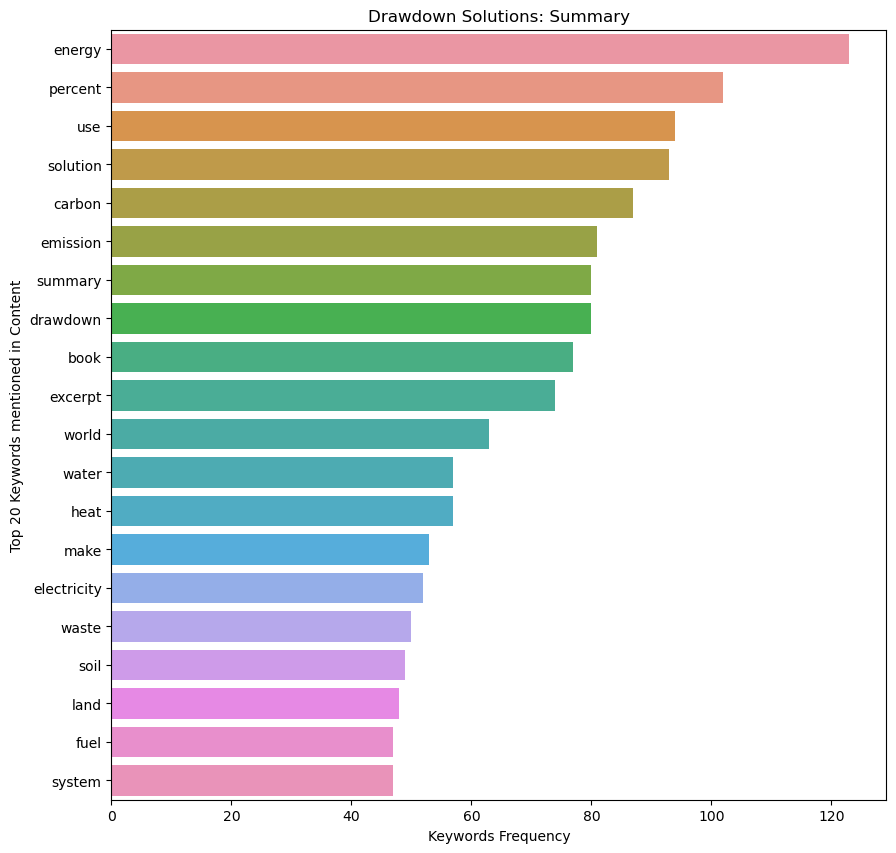

In [30]:
df_dd_solutions["summary_prep"] = [' '.join(map(str, l)) for l in df_dd_solutions["summary_tk"]]

plot_top_keywords_barchart(df_dd_solutions["summary_prep"], 'Drawdown Solutions: Summary',1)
plt.show()

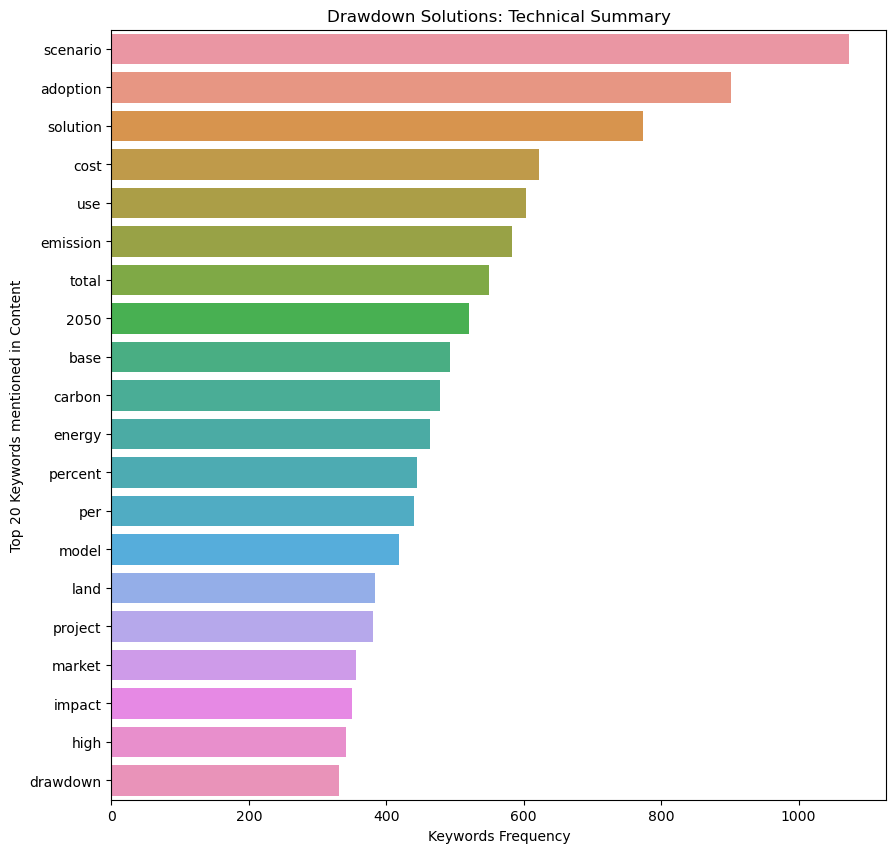

In [29]:
df_dd_solutions["tech_summary_prep"] = [' '.join(map(str, l)) for l in df_dd_solutions["tech_summary_tk"]]

plot_top_keywords_barchart(df_dd_solutions["tech_summary_prep"], 'Drawdown Solutions: Technical Summary',1)
plt.show()

We can now compare how the keywords diverge across categories:

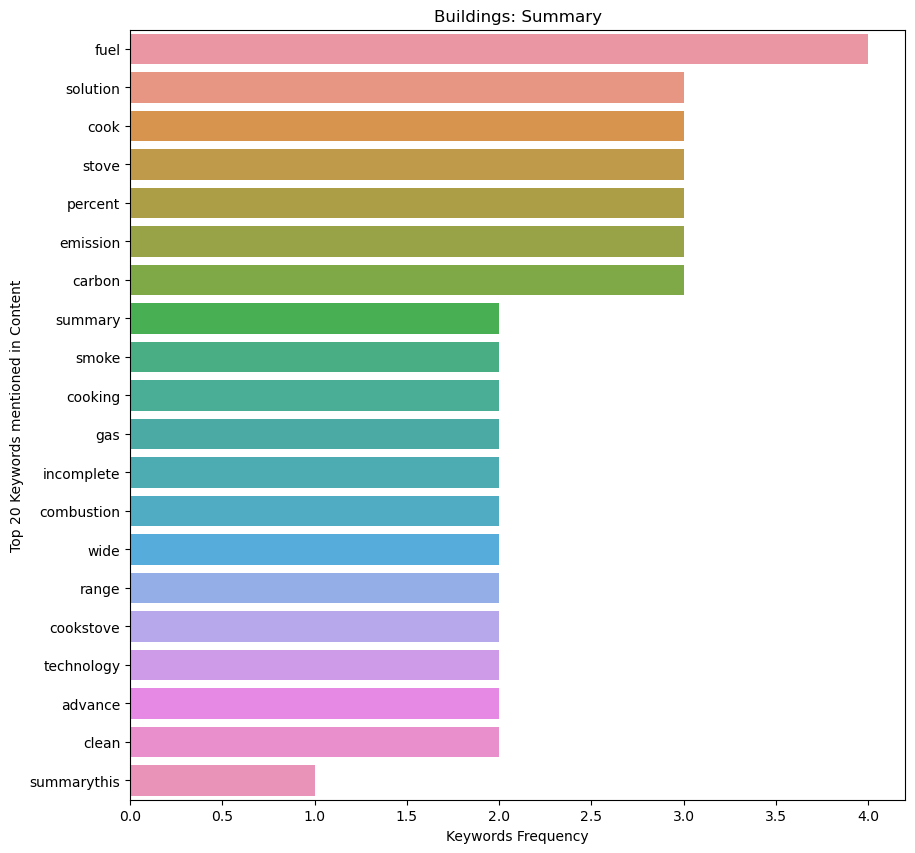

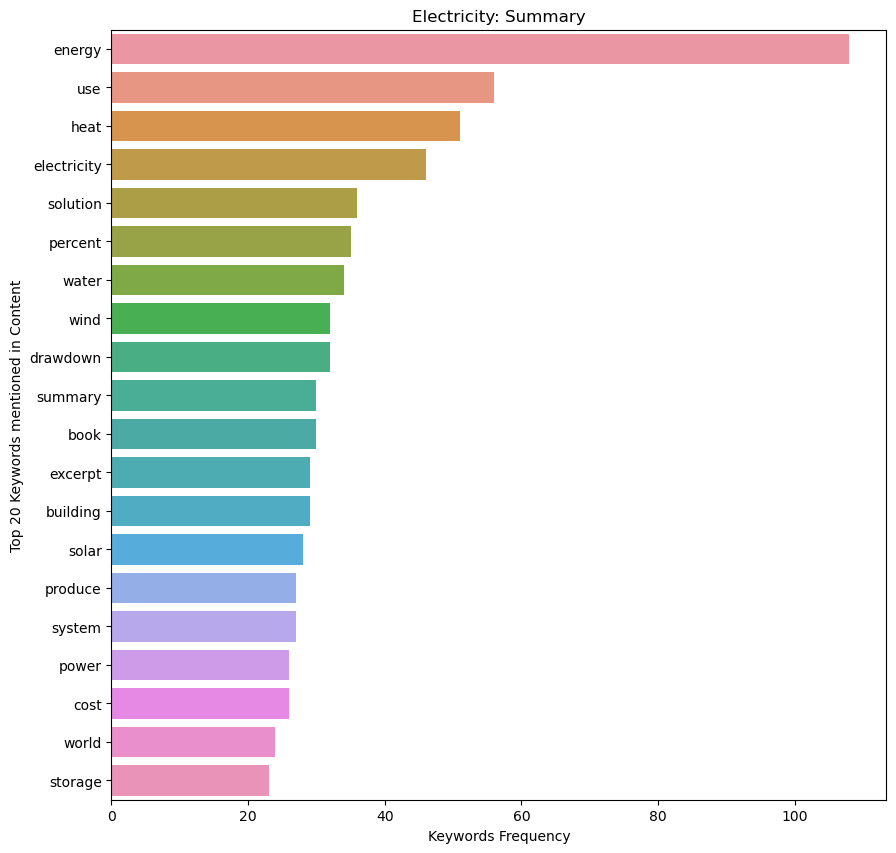

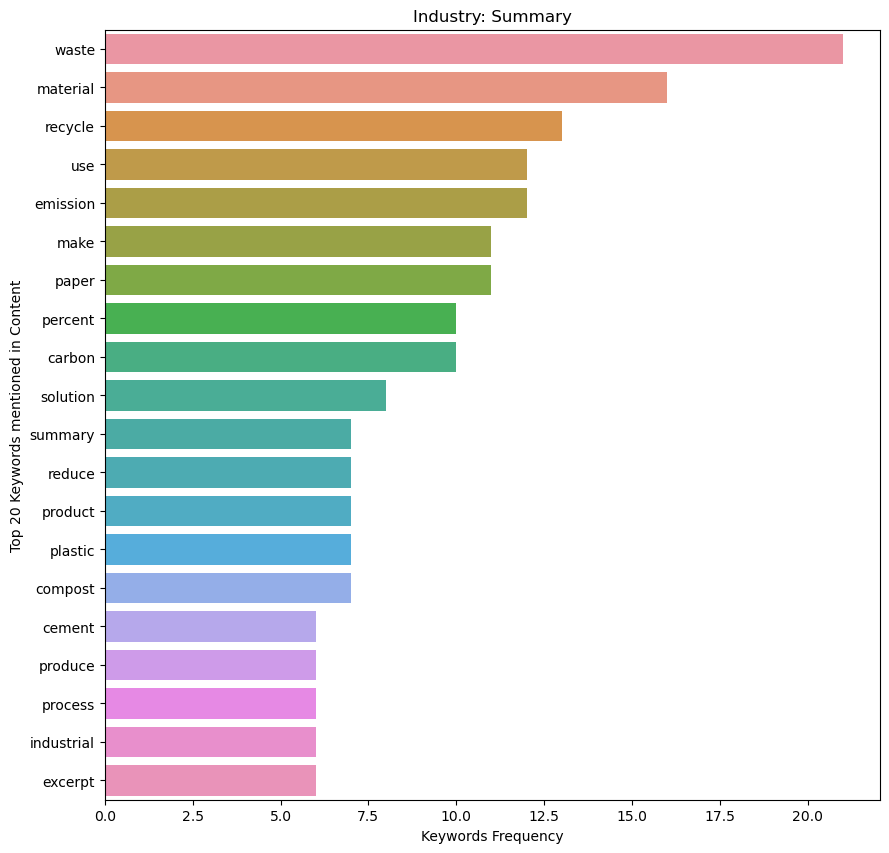

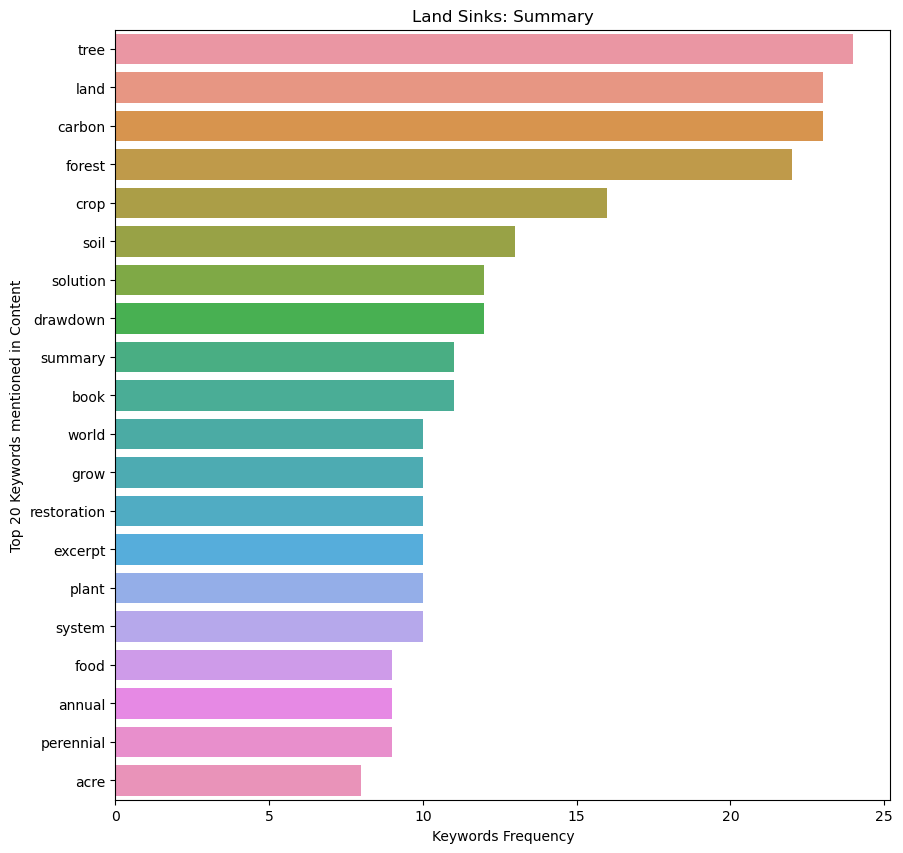

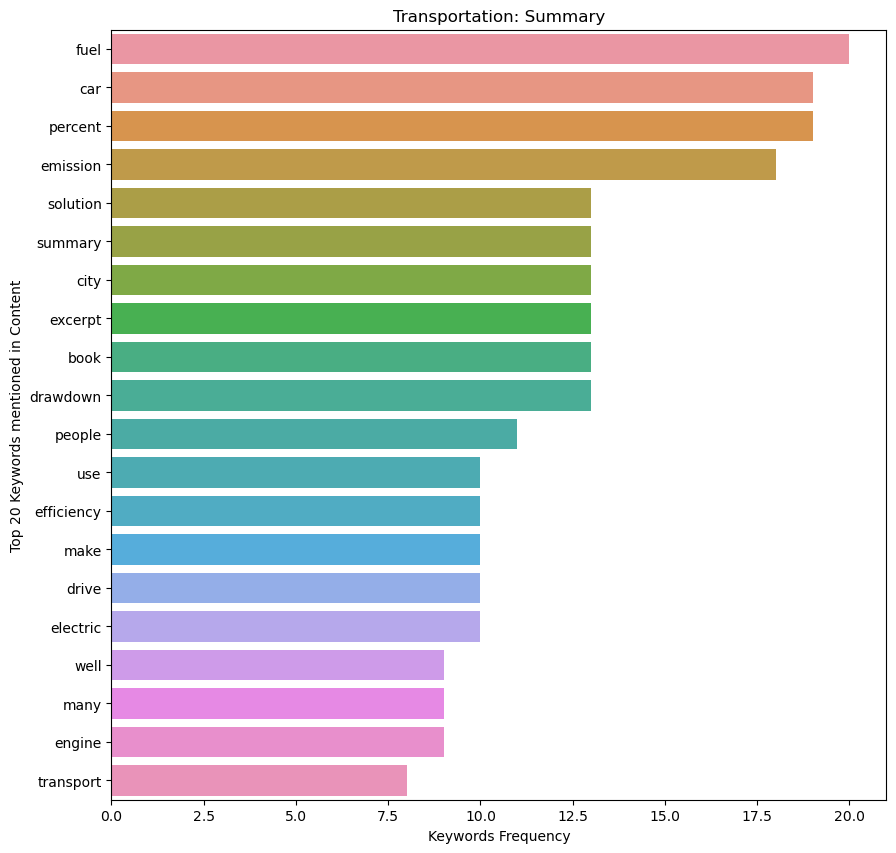

In [48]:
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Buildings']["summary_prep"], 'Buildings: Summary', 1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Coastal and Ocean Sinks']["summary_prep"], 'Coastal and Ocean Sinks: Summary', 1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Electricity']["summary_prep"], 'Electricity: Summary', 1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Engineered Sinks']["summary_prep"], 'Engineered Sinks: Summary', 1)
#plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]== 'Food, Agriculture, and\xa0Land Use']["summary_prep"], 'Food, Agriculture, and\xa0Land Use: Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Health and Education']["summary_prep"], 'Health and Education: Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Industry']["summary_prep"], 'Industry: Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Land Sinks']["summary_prep"], 'Land Sinks: Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Transportation']["summary_prep"], 'Transportation: Summary',1)
plt.show()

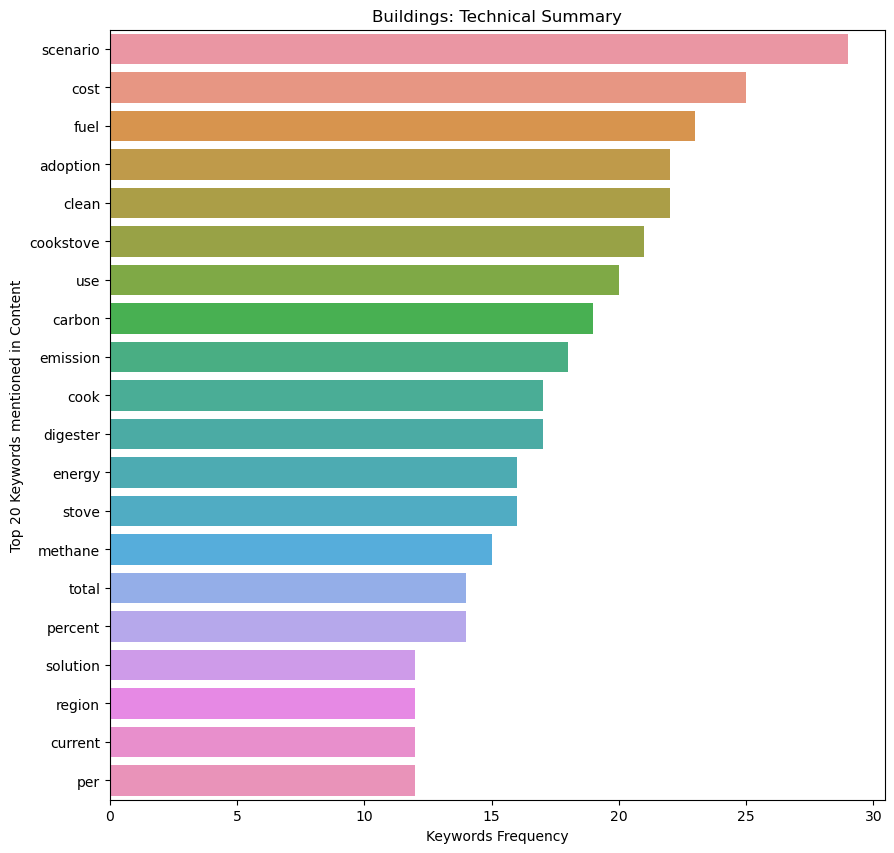

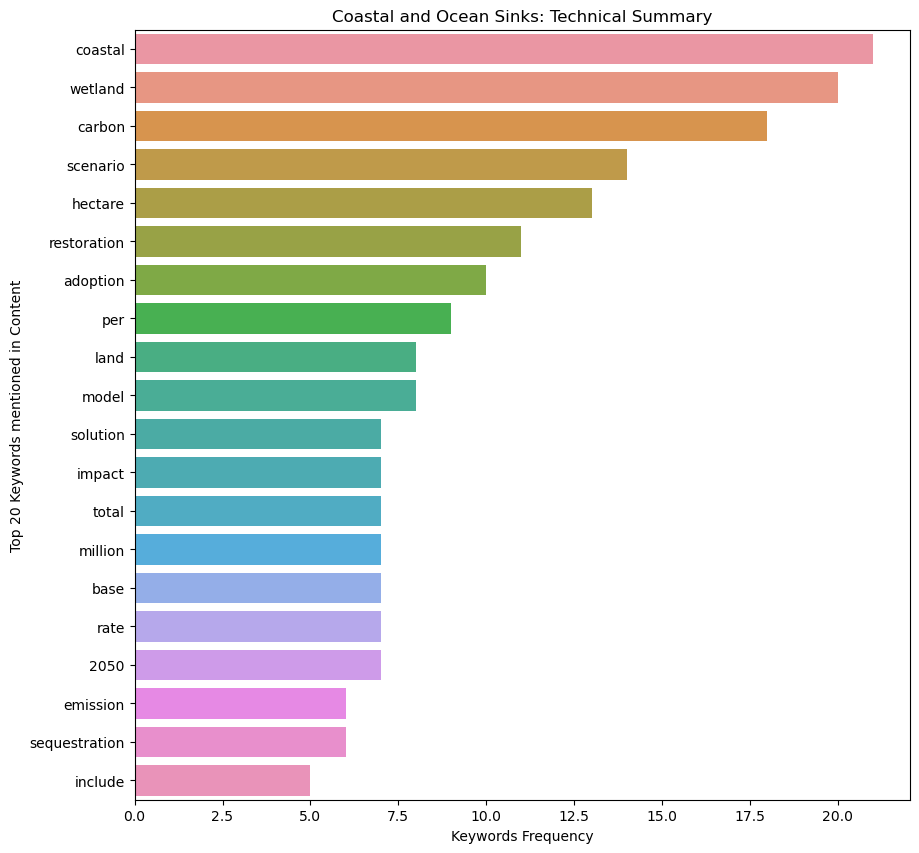

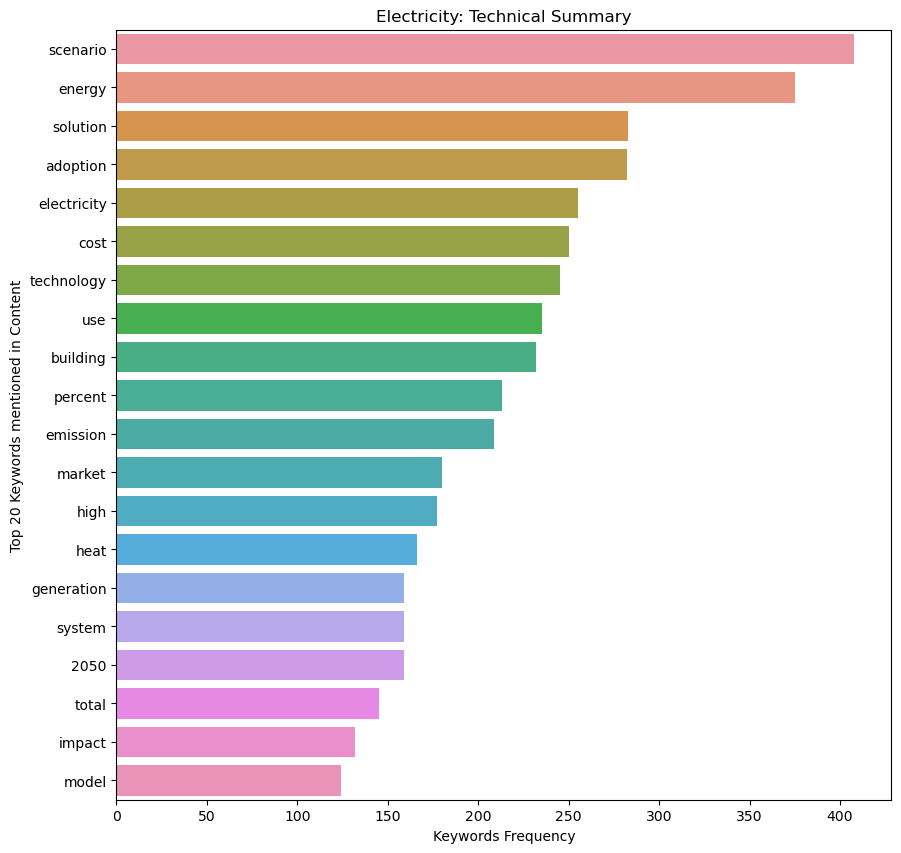

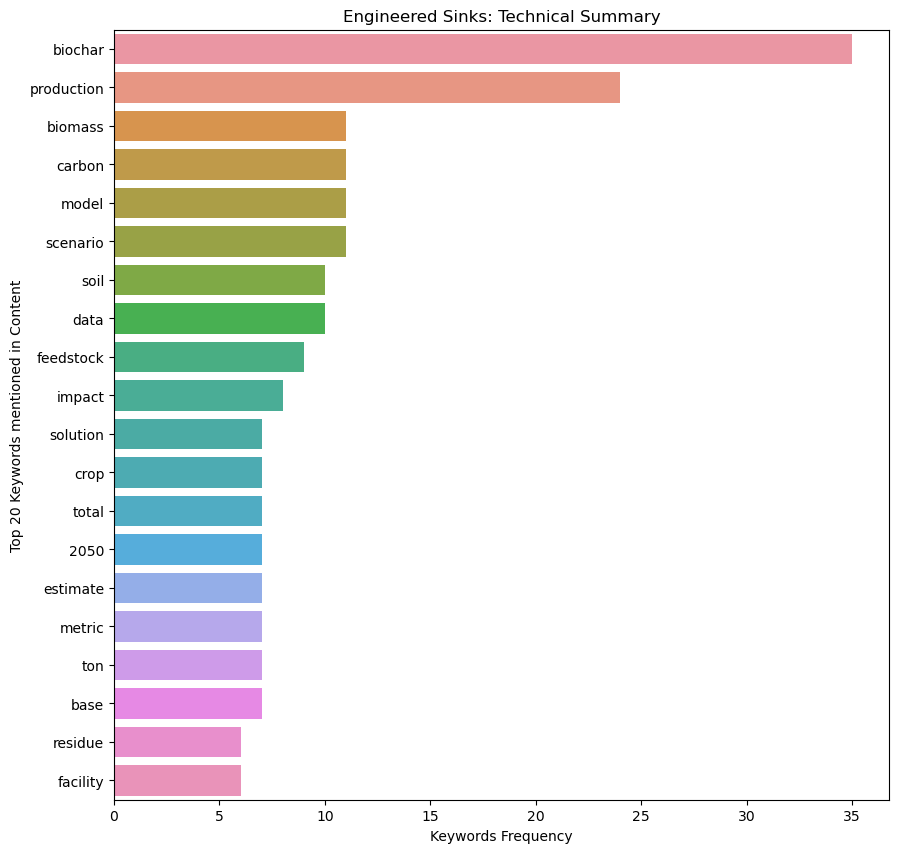

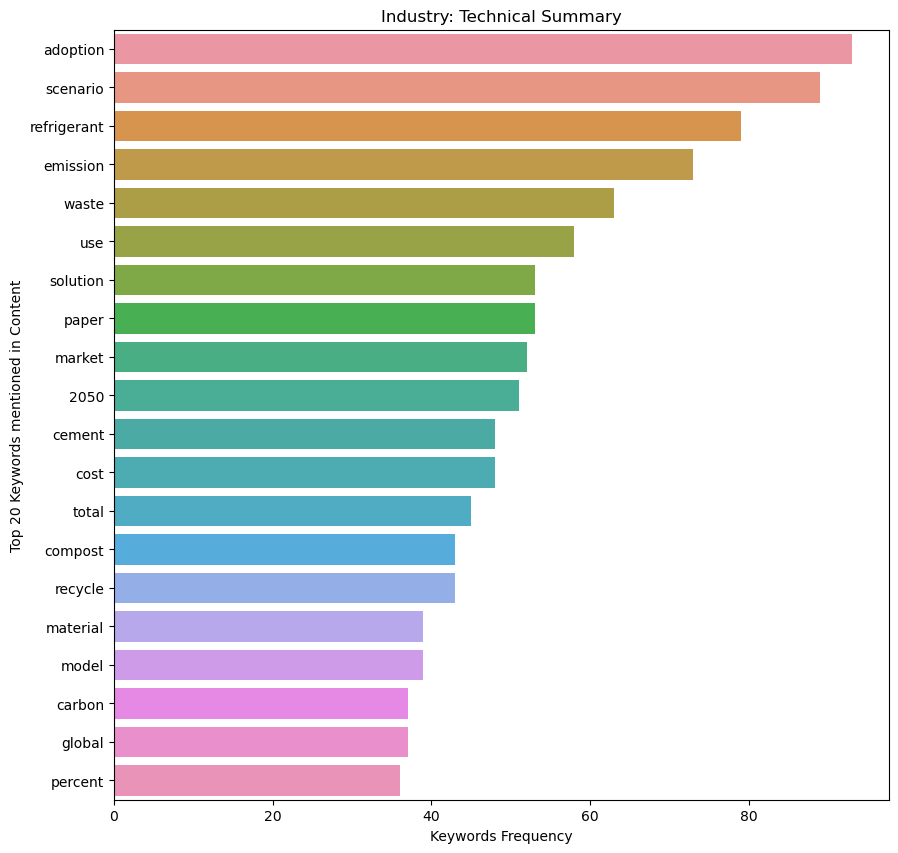

In [49]:
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Buildings']["tech_summary_prep"], 'Buildings: Technical Summary', 1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Coastal and Ocean Sinks']["tech_summary_prep"], 'Coastal and Ocean Sinks: Technical Summary', 1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Electricity']["tech_summary_prep"], 'Electricity: Technical Summary', 1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Engineered Sinks']["tech_summary_prep"], 'Engineered Sinks: Technical Summary', 1)
#plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]== 'Food, Agriculture, and\xa0Land Use']["summary_prep"], 'Food, Agriculture, and\xa0Land Use: Technical Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Health and Education']["tech_summary_prep"], 'Health and Education: Technical Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Industry']["tech_summary_prep"], 'Industry: Technical Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Land Sinks']["tech_summary_prep"], 'Land Sinks: Technical Summary',1)
plot_top_keywords_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Transportation']["tech_summary_prep"], 'Transportation: Technical Summary',1)
plt.show()

We can summarize the most common words per category in wordcloud visualizations:

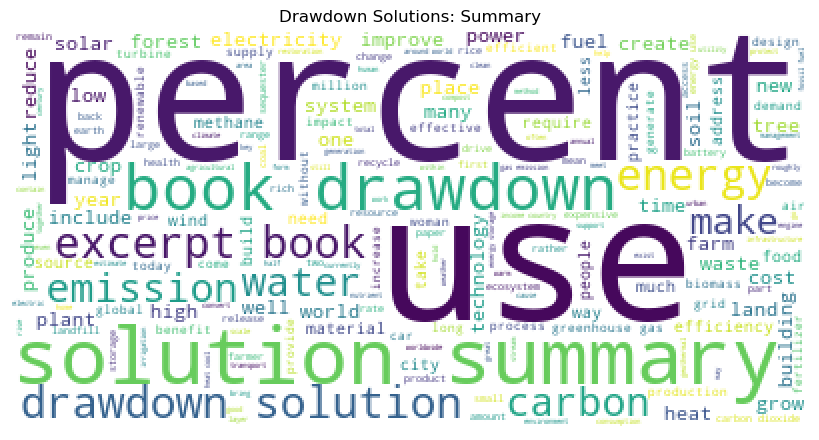

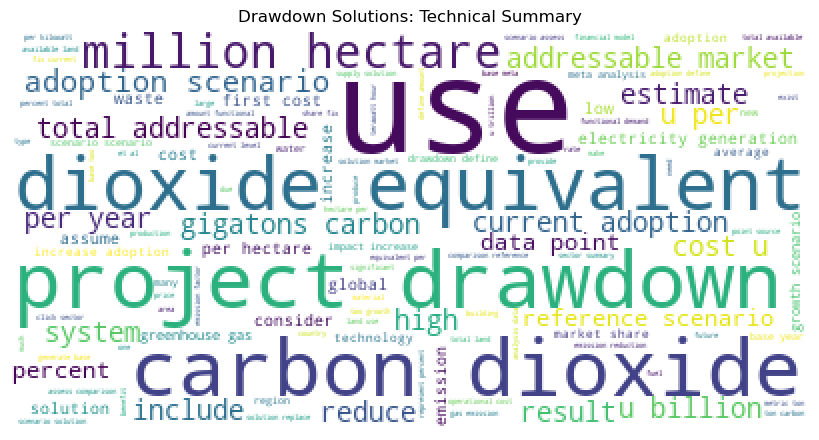

In [32]:
def wordcloud(sentence, title):

    stopword = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white", max_words=2000, stopwords=stopword, 
                          contour_width=1).generate(' '.join(sentence))   

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()
    
wordcloud(df_dd_solutions['summary_prep'], 'Drawdown Solutions: Summary')
wordcloud(df_dd_solutions['tech_summary_prep'], 'Drawdown Solutions: Technical Summary')

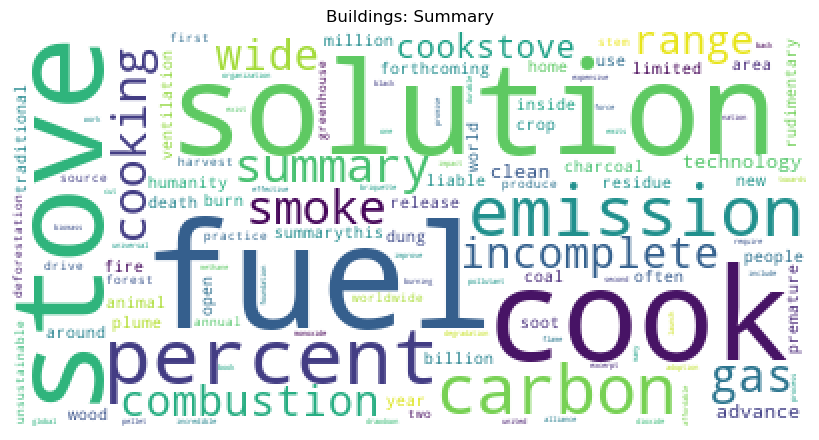

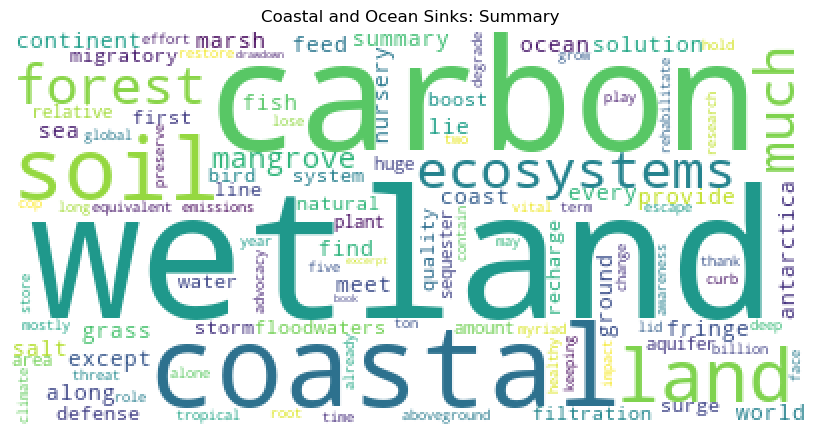

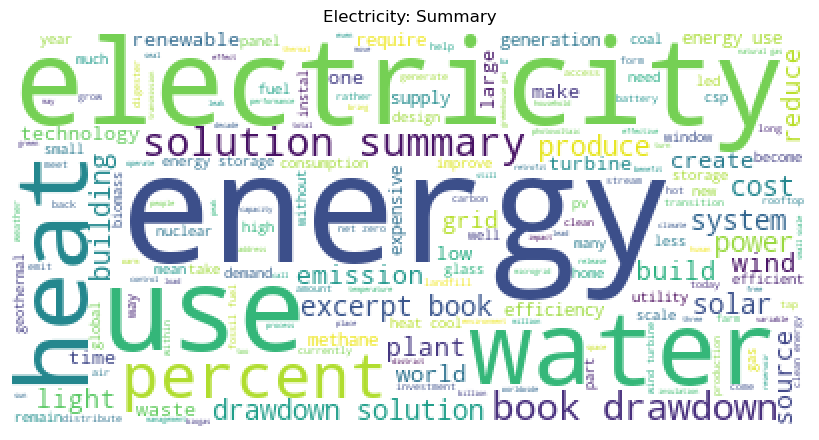

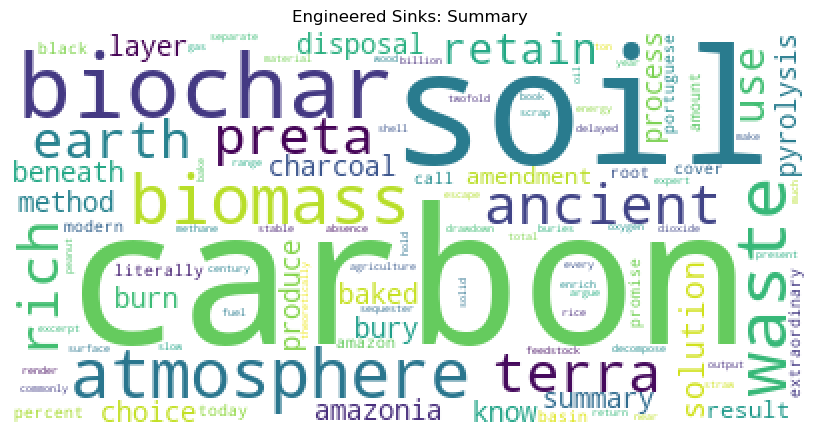

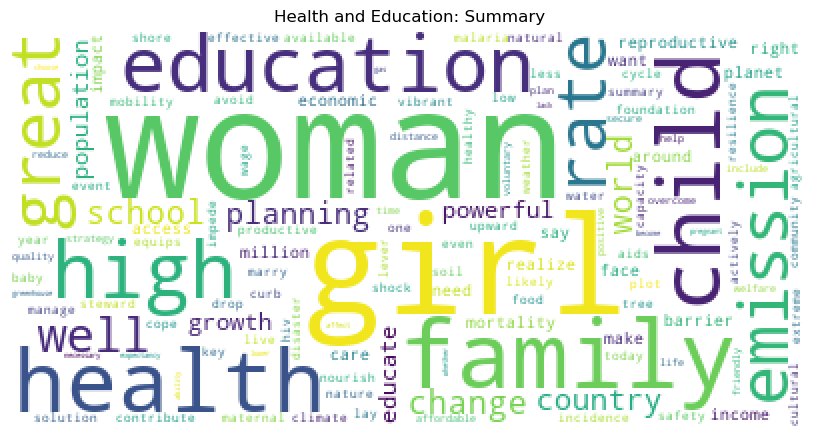

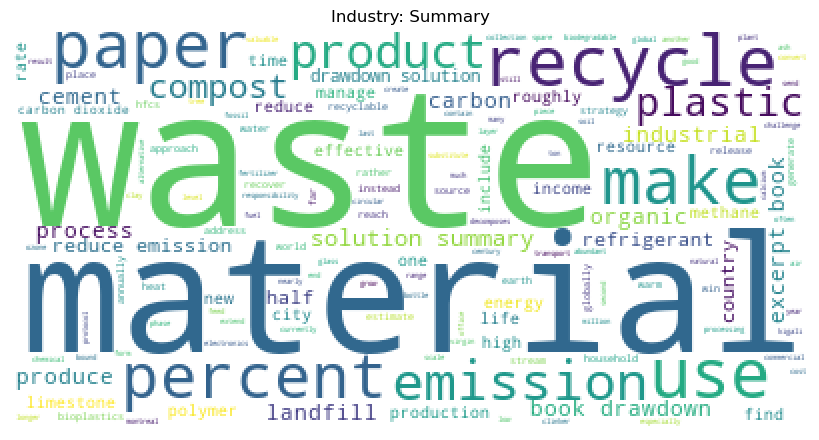

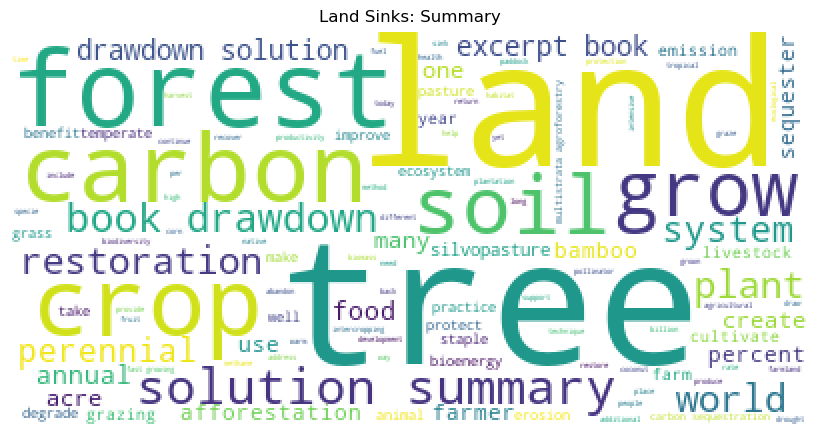

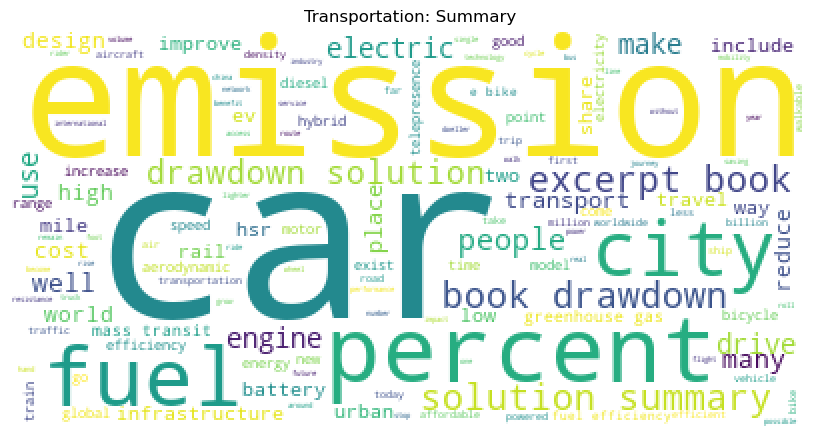

In [50]:
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Buildings']["summary_prep"], 'Buildings: Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Coastal and Ocean Sinks']["summary_prep"], 'Coastal and Ocean Sinks: Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Electricity']["summary_prep"], 'Electricity: Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Engineered Sinks']["summary_prep"], 'Engineered Sinks: Summary')
#wordcloud(df_dd_solutions[df_dd_solutions["node1"]== 'Food, Agriculture, and\xa0Land Use']["summary_prep"], 'Food, Agriculture, and\xa0Land Use: Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Health and Education']["summary_prep"], 'Health and Education: Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Industry']["summary_prep"], 'Industry: Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Land Sinks']["summary_prep"], 'Land Sinks: Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Transportation']["summary_prep"], 'Transportation: Summary')
plt.show()

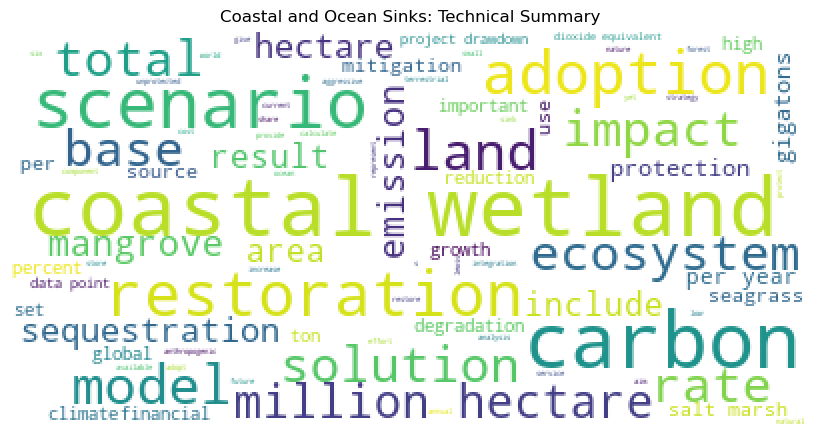

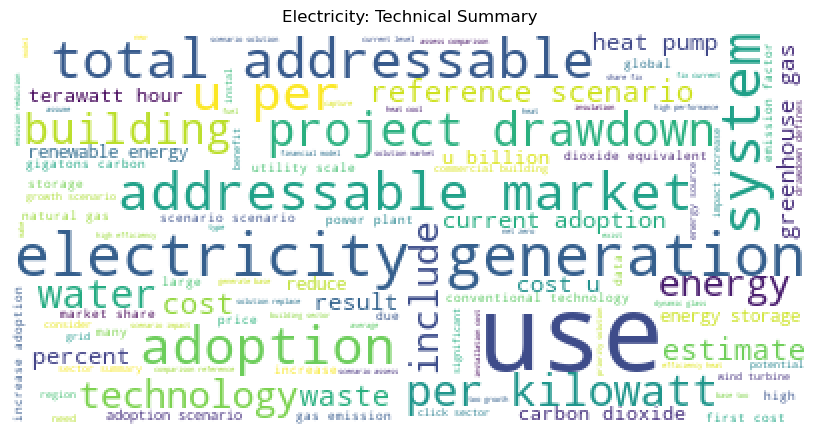

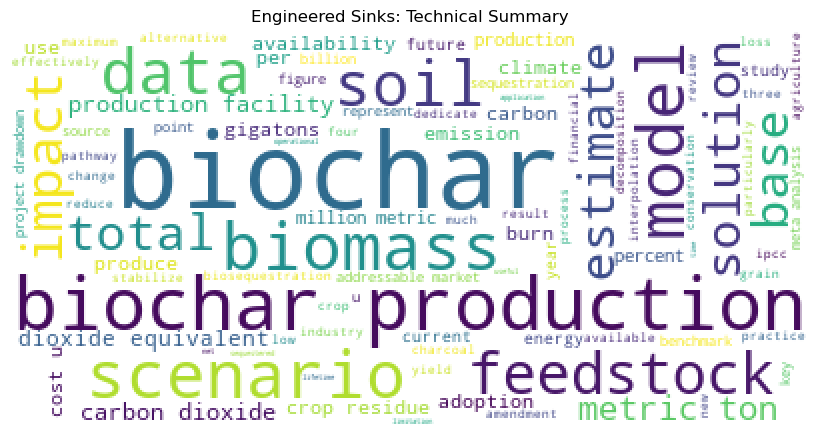

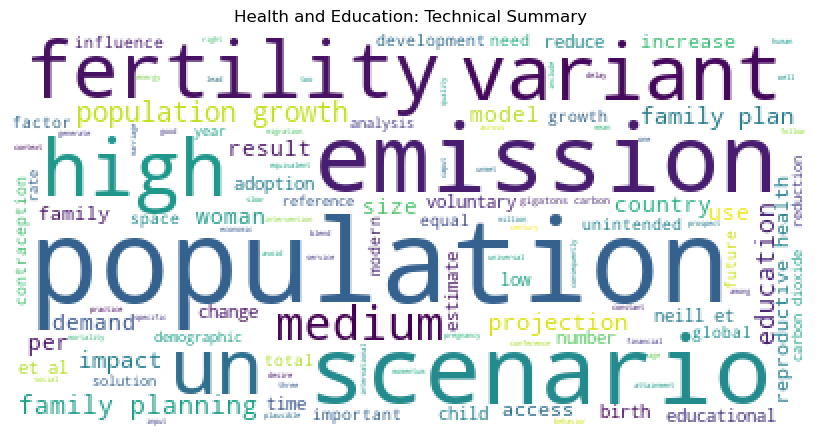

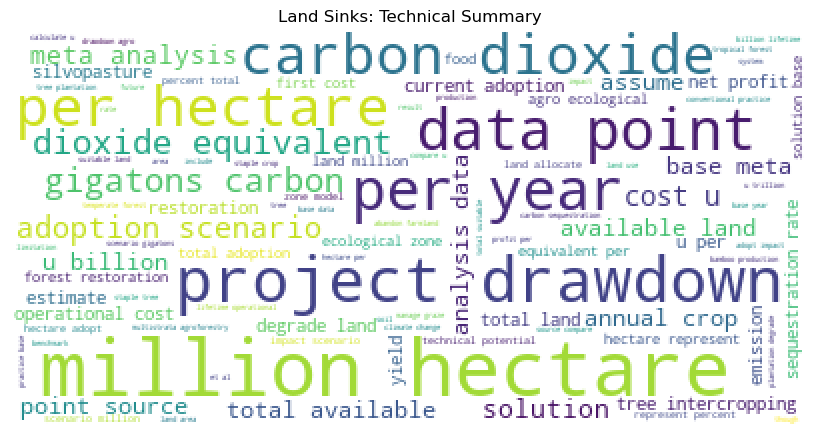

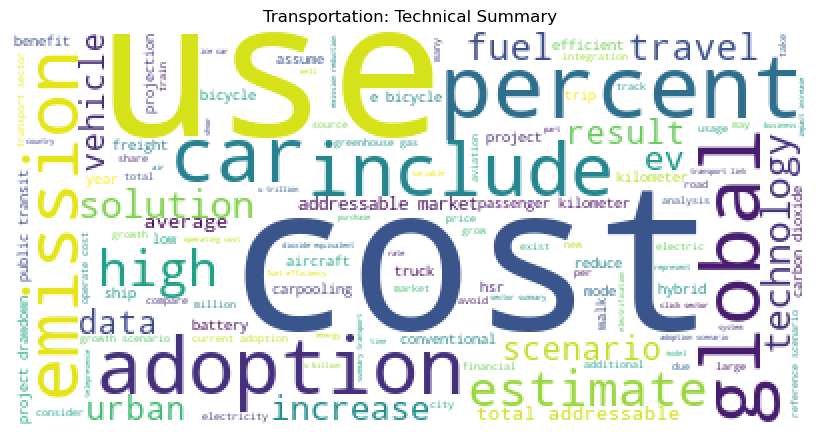

In [51]:
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Buildings']["tech_summary_prep"], 'Buildings: Technical Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Coastal and Ocean Sinks']["tech_summary_prep"], 'Coastal and Ocean Sinks: Technical Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Electricity']["tech_summary_prep"], 'Electricity: Technical Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Engineered Sinks']["tech_summary_prep"], 'Engineered Sinks: Technical Summary')
#wordcloud(df_dd_solutions[df_dd_solutions["node1"]== 'Food, Agriculture, and\xa0Land Use']["tech_summary_prep"], 'Food, Agriculture, and\xa0Land Use: Technical Summary',1)
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Health and Education']["tech_summary_prep"], 'Health and Education: Technical Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Industry']["tech_summary_prep"], 'Industry: Technical Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Land Sinks']["tech_summary_prep"], 'Land Sinks: Technical Summary')
wordcloud(df_dd_solutions[df_dd_solutions["node1"]=='Transportation']["tech_summary_prep"], 'Transportation: Technical Summary')
plt.show()

In [40]:
#Bi-grams 

def plot_top_bigrams_barchart(text, title, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in Solutions")
    sns.barplot(x=y,y=x)
    

Checking most common bi-grams for the whole dataset, i.e., most common combinations of 2 words:

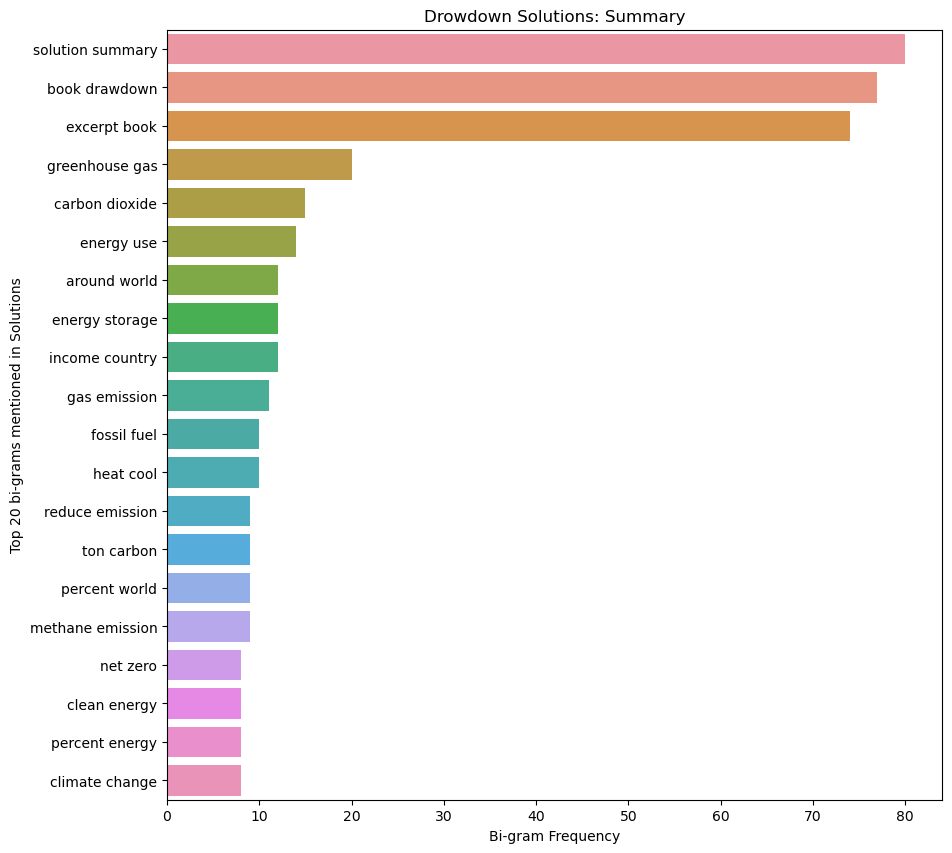

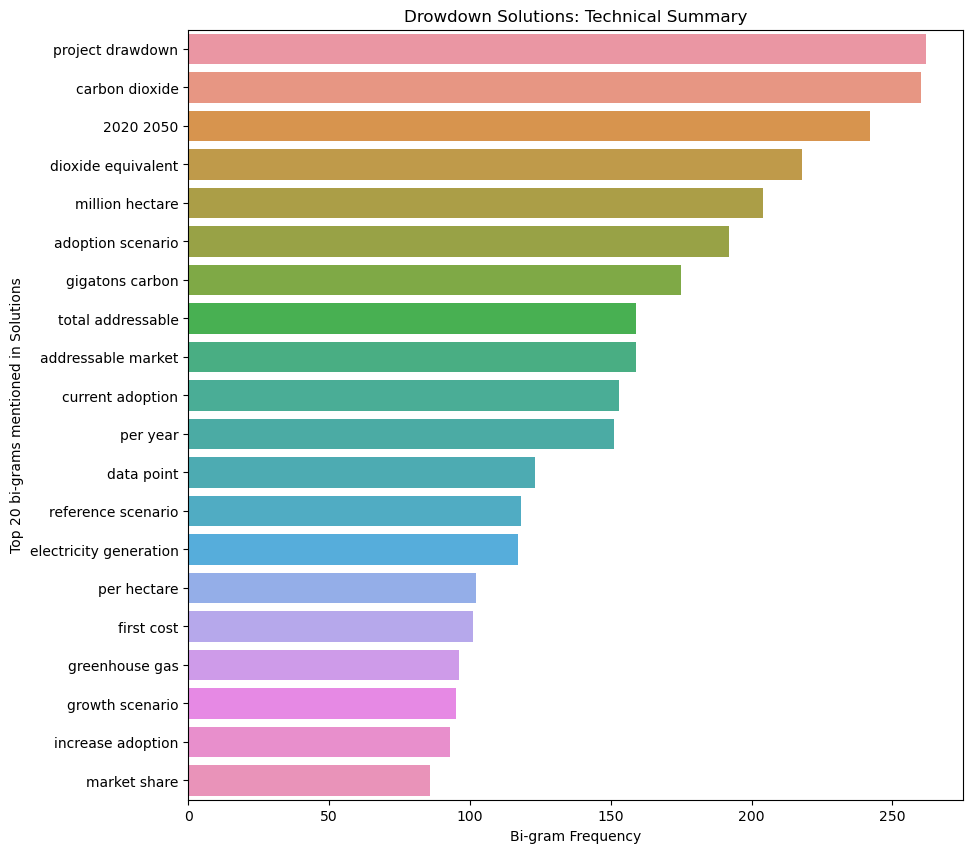

In [43]:
plot_top_bigrams_barchart(df_dd_solutions['summary_prep'], 'Drowdown Solutions: Summary', 2)
plot_top_bigrams_barchart(df_dd_solutions['tech_summary_prep'], 'Drowdown Solutions: Technical Summary', 2)
plt.show()

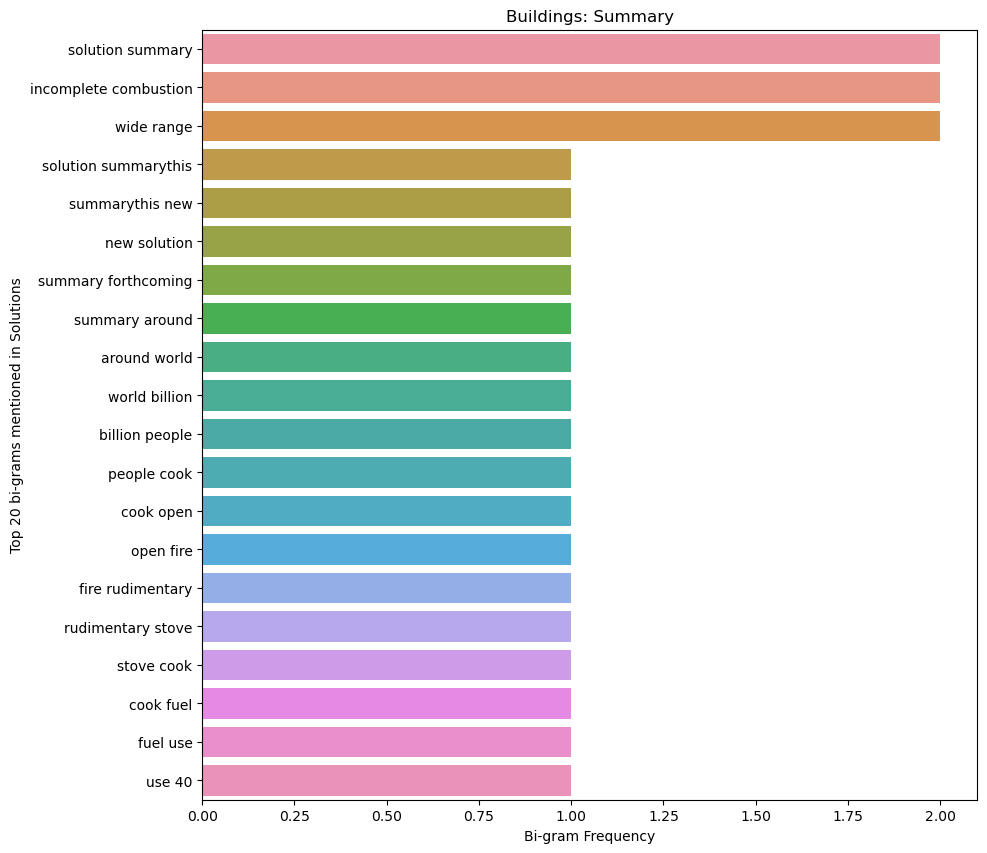

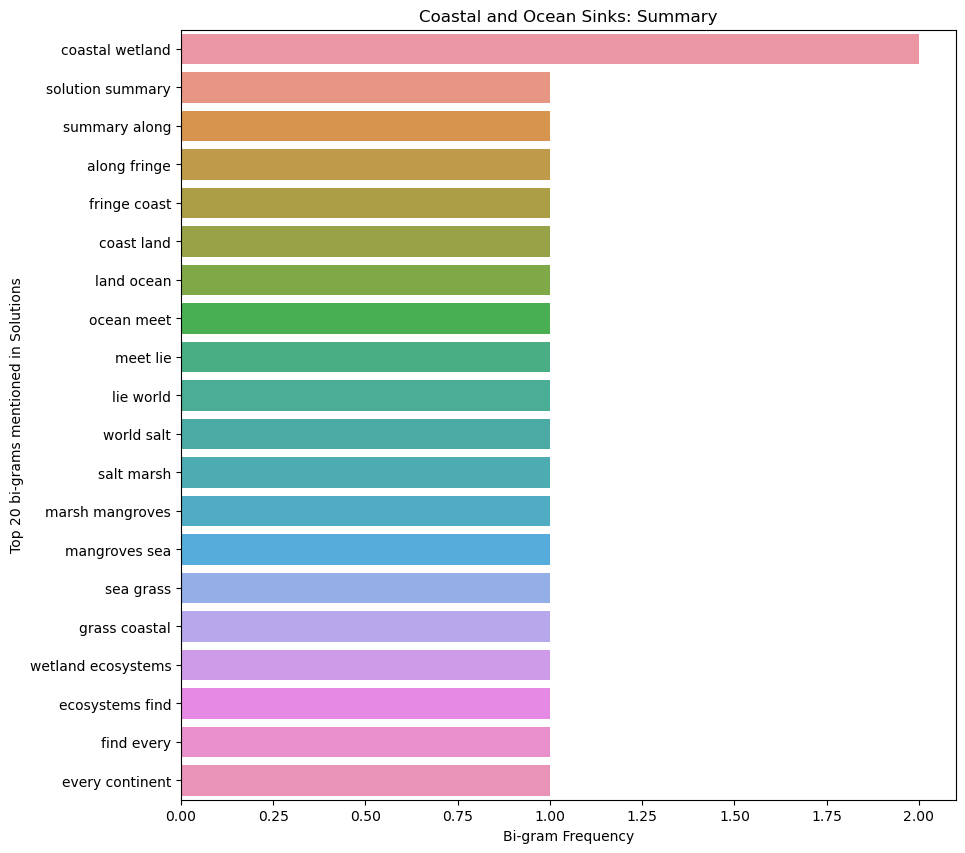

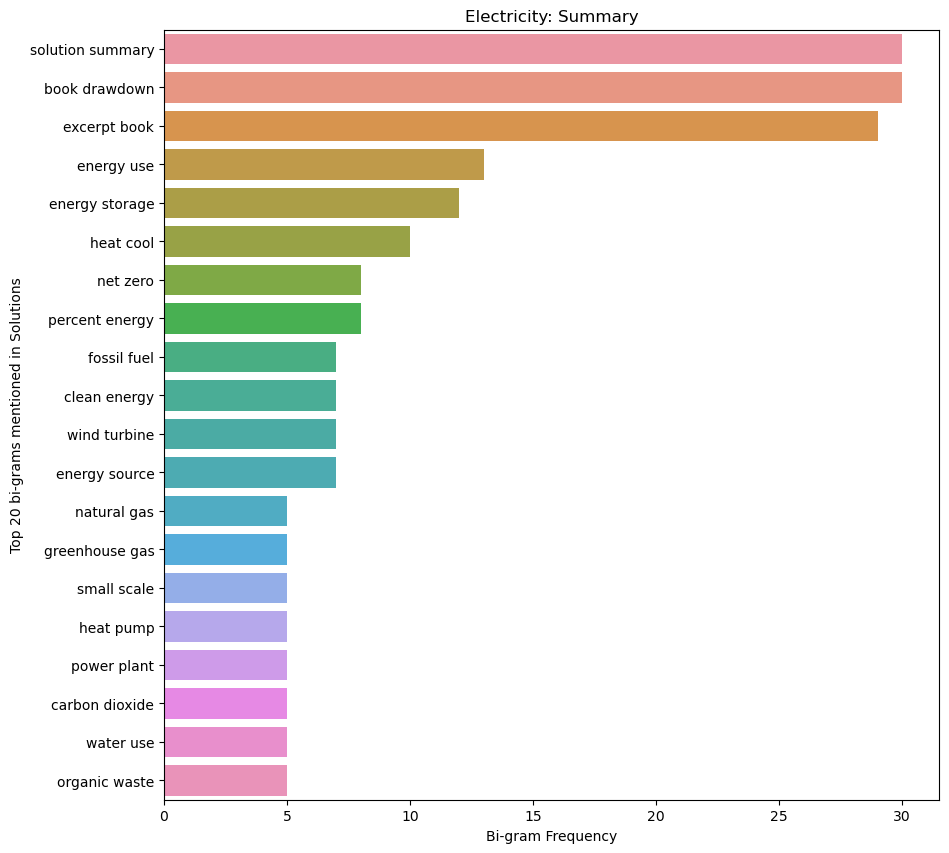

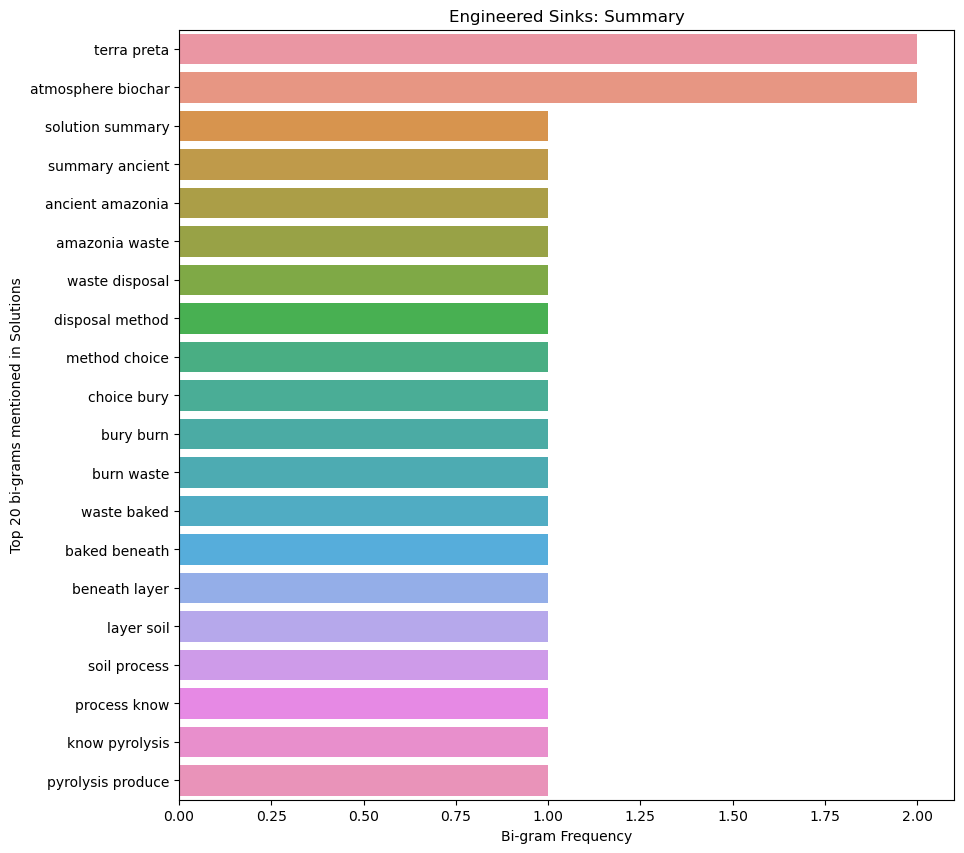

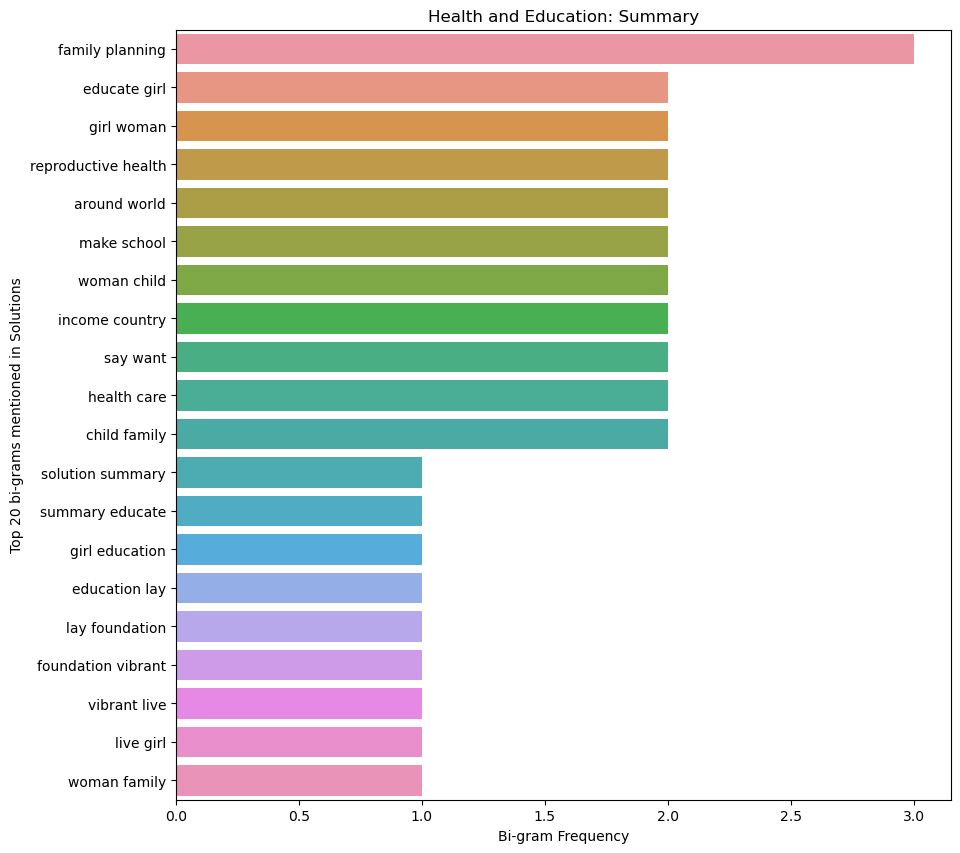

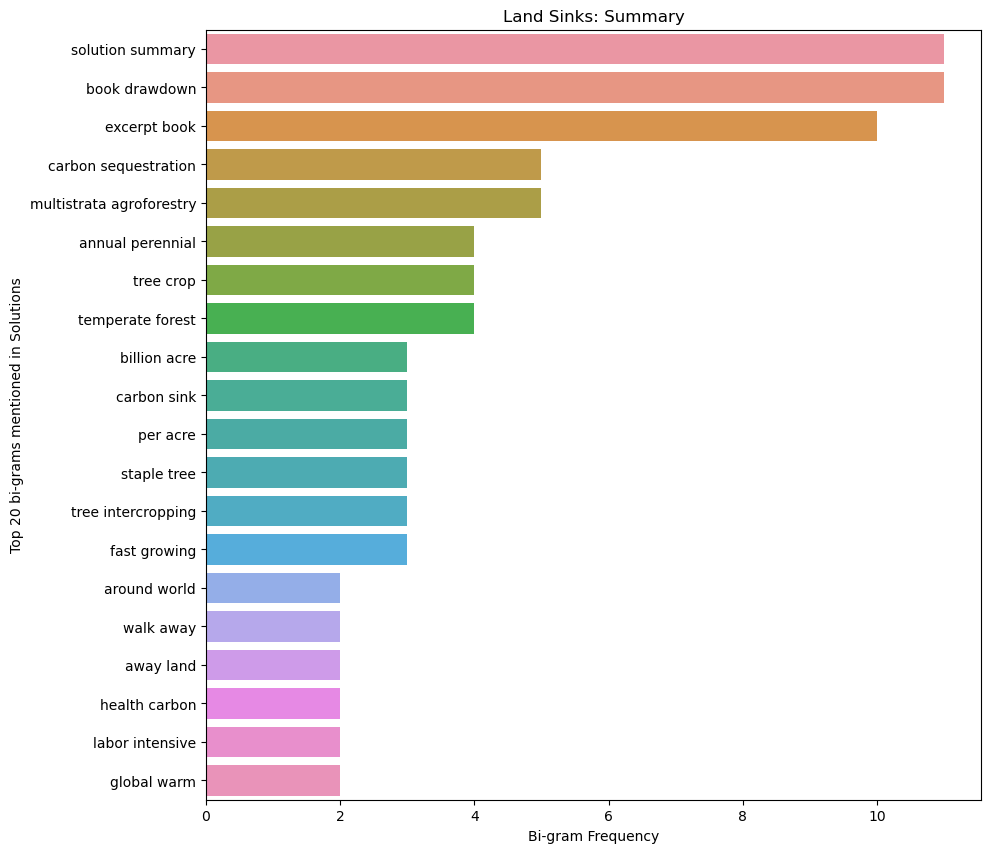

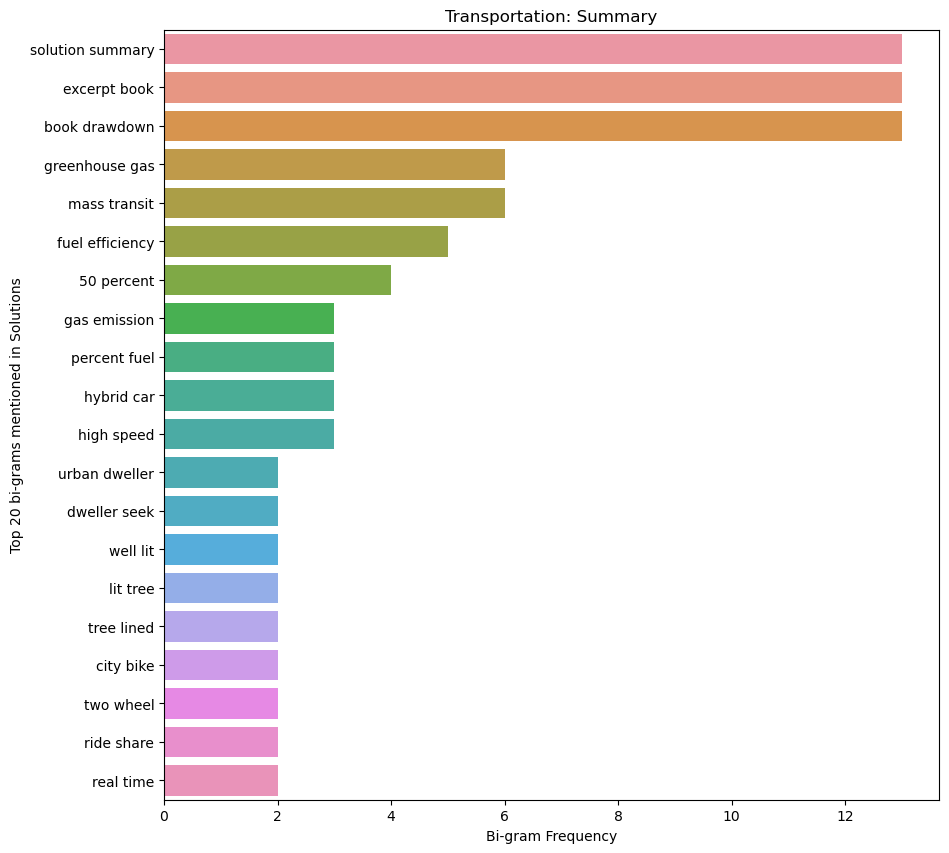

In [52]:
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Buildings']["summary_prep"], 'Buildings: Summary', 2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Coastal and Ocean Sinks']["summary_prep"], 'Coastal and Ocean Sinks: Summary', 2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Electricity']["summary_prep"], 'Electricity: Summary', 2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Engineered Sinks']["summary_prep"], 'Engineered Sinks: Summary', 2)
#plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]== 'Food, Agriculture, and\xa0Land Use']["summary_prep"], 'Food, Agriculture, and\xa0Land Use: Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Health and Education']["summary_prep"], 'Health and Education: Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Industry']["summary_prep"], 'Industry: Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Land Sinks']["summary_prep"], 'Land Sinks: Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Transportation']["summary_prep"], 'Transportation: Summary',2)
plt.show()

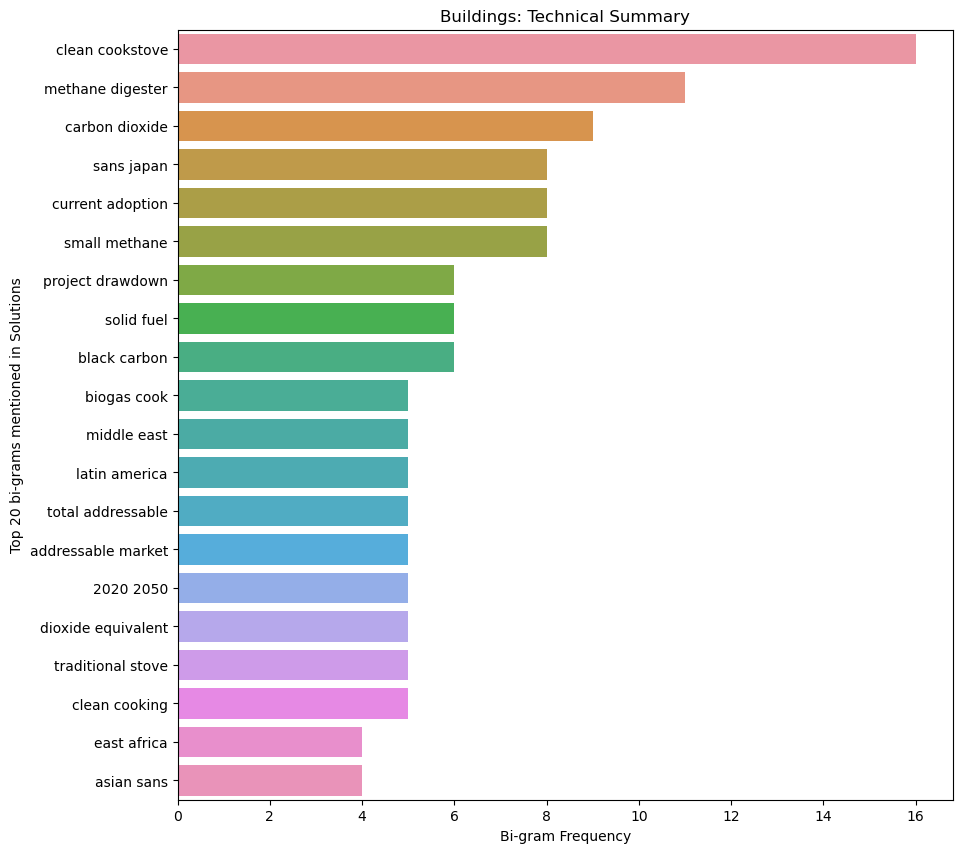

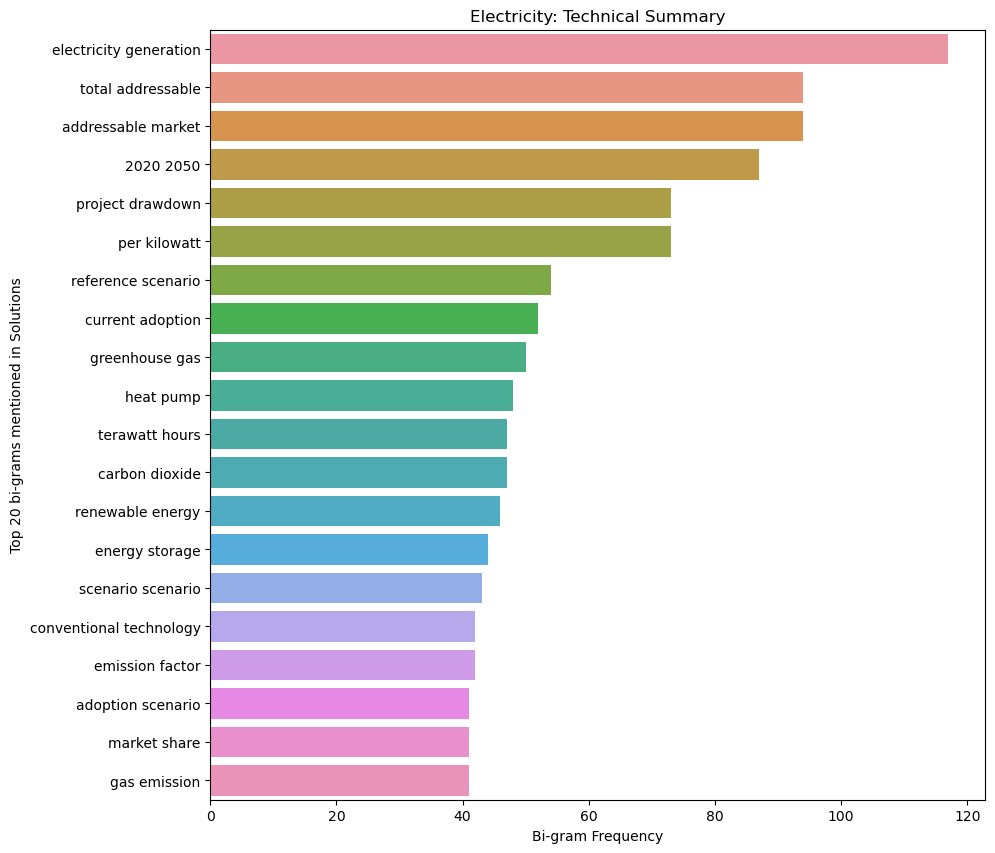

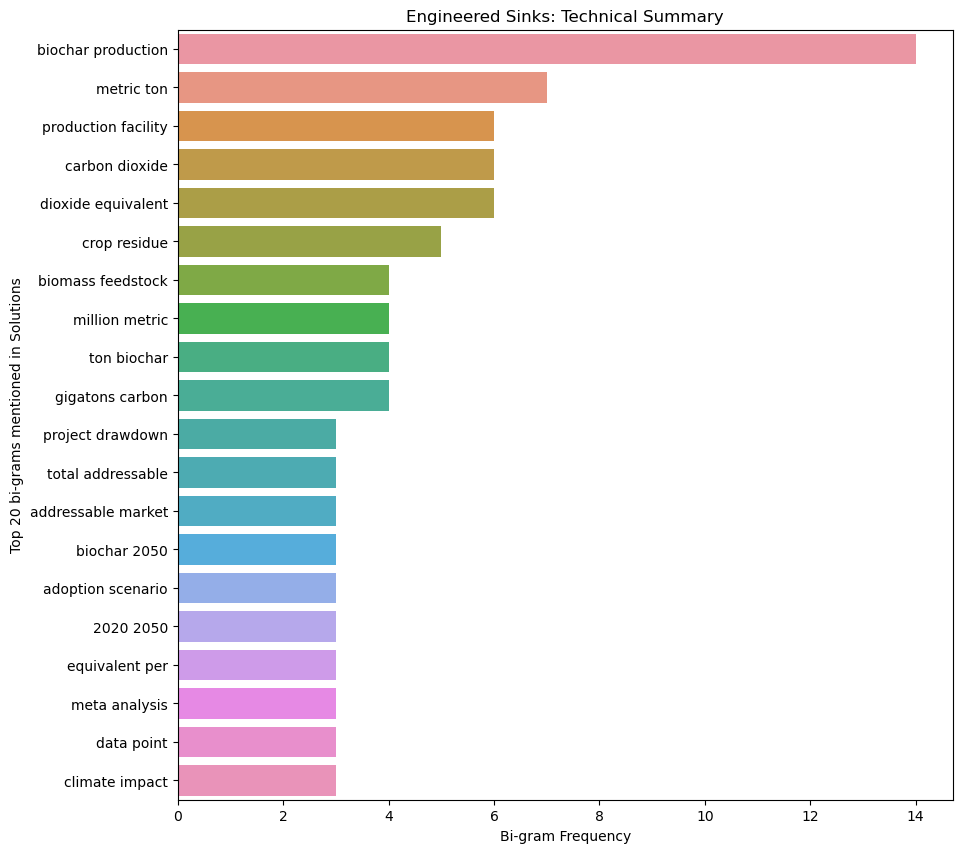

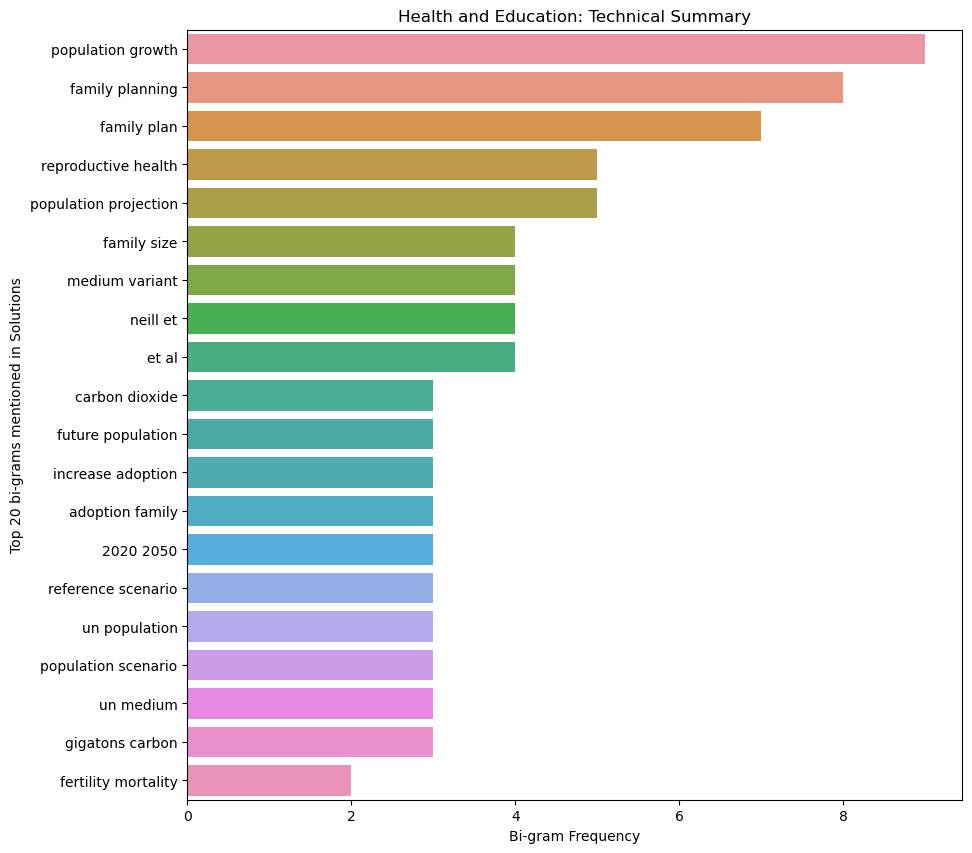

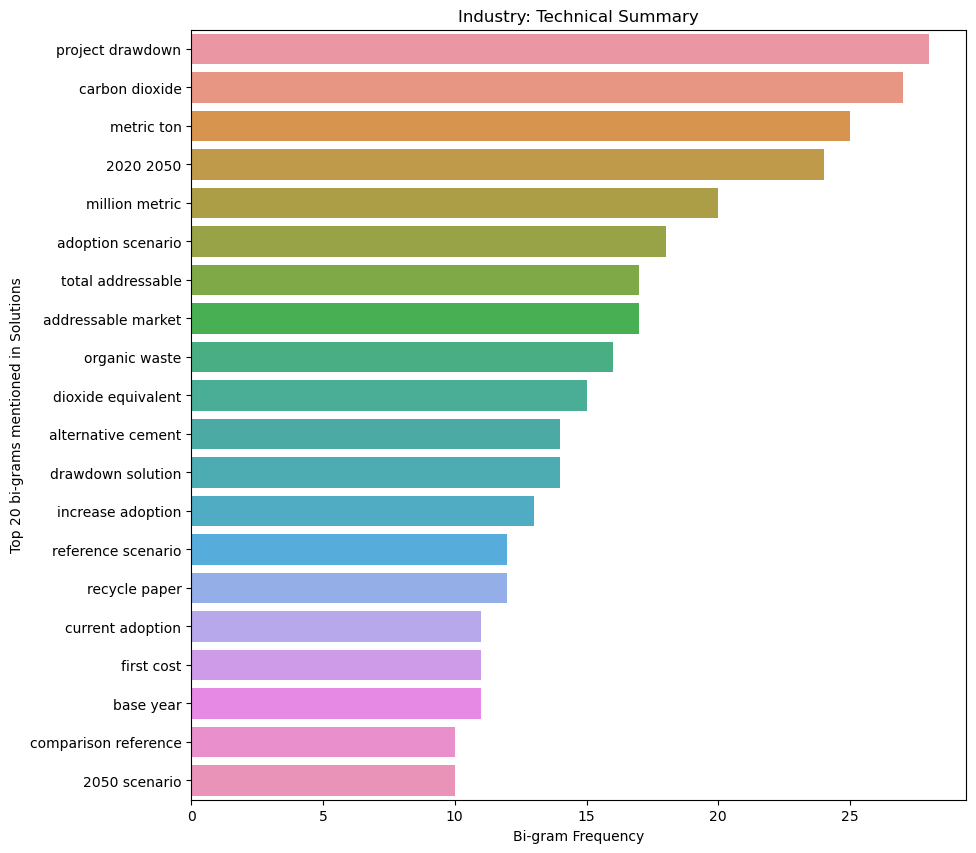

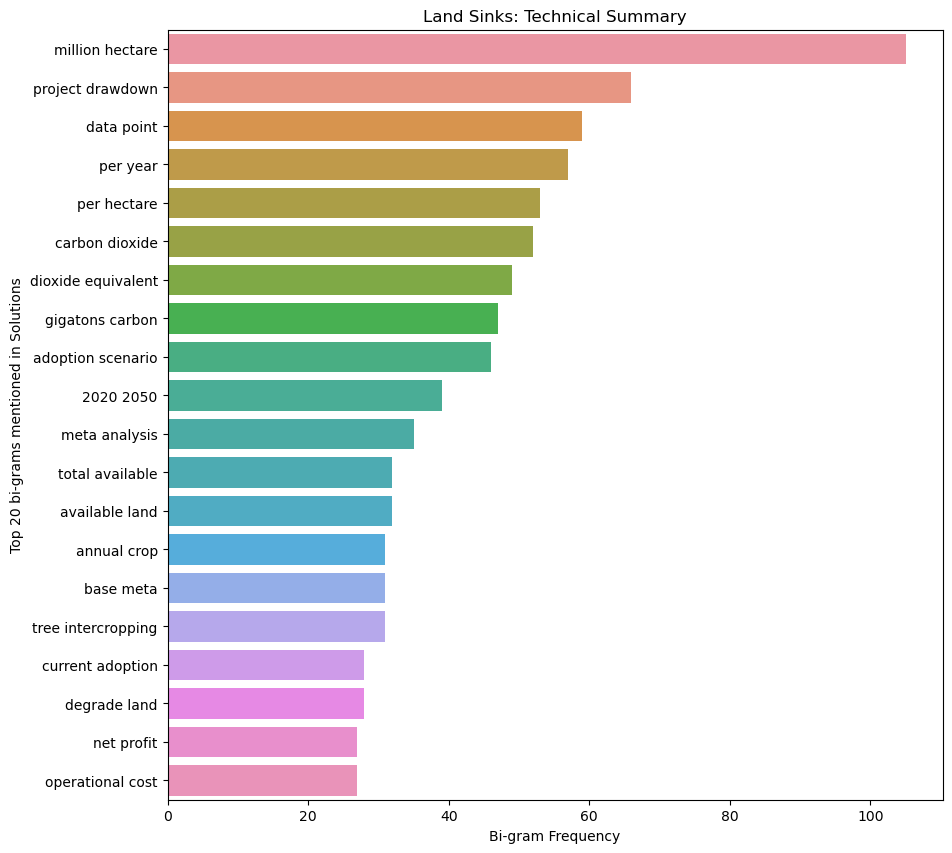

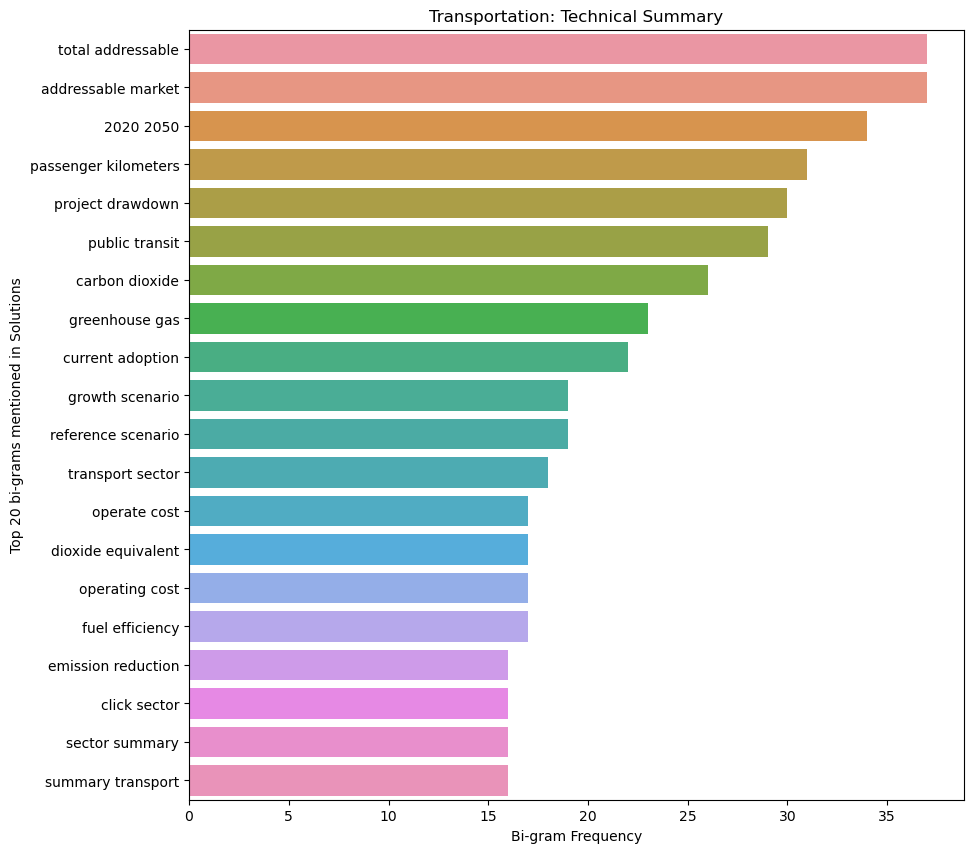

In [53]:
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Buildings']["tech_summary_prep"], 'Buildings: Technical Summary', 2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Coastal and Ocean Sinks']["tech_summary_prep"], 'Coastal and Ocean Sinks: Technical Summary', 2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Electricity']["tech_summary_prep"], 'Electricity: Technical Summary', 2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Engineered Sinks']["tech_summary_prep"], 'Engineered Sinks: Technical Summary', 2)
#plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]== 'Food, Agriculture, and\xa0Land Use']["tech_summary_prep"], 'Food, Agriculture, and\xa0Land Use: Technical Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Health and Education']["tech_summary_prep"], 'Health and Education: Technical Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Industry']["tech_summary_prep"], 'Industry: Technical Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Land Sinks']["tech_summary_prep"], 'Land Sinks: Technical Summary',2)
plot_top_bigrams_barchart(df_dd_solutions[df_dd_solutions["node1"]=='Transportation']["tech_summary_prep"], 'Transportation: Technical Summary',2)
plt.show()